# Problem 1

The goal of this question is to familiarize you with sine waves and audio  as  well  as  the  basic  operations  from  which  the  DFT  is  built  i.e  the vector inner product and sinusoidal basis functions.  You can use any programming language for your implementation but it will probably be easier to do in an environment that supports plotting such as Matlab/Octave or Python/NumPy/SciPy/Matplotlib.  Feel free to use the code we examined during class as a foundation for your submission.

## 1.a (\*)

Write a function that makes a mixture of three harmonically related sinusoids with frequencies $f$, $2f$, $3f$ with user provided amplitudes and phases.  Show a time domain plot of adding three sinusoids with amplitude $1.0$. $0.5$, $0.33$ corresponding respectively to $f$, $2f$, $3f$ all with 0 phases and another plot with random phases.  Using this function generate two seconds of audio in .wav format for a mixture with $f = 440 Hz$. Listen to the generated mixture using an audio editor like Audacity. Provide a figure showing the spectrogram of your mixture using Audacity.

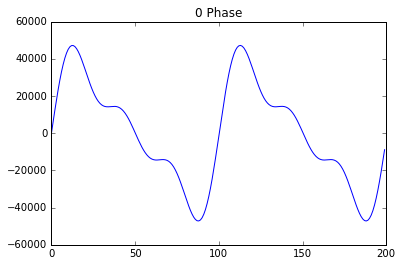

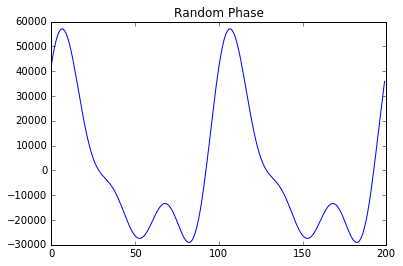

In [2]:
%matplotlib inline
from pylab import *
import wave
import struct
import random

# Config for audio.
samplingRate = 44100
numSamples = 2 * 44100
numCycles = numSamples / samplingRate
frequency = 440

time_space = linspace(0, numCycles, numSamples)

# Audio config
amplitude = 0.8
phase = 0.0
maxVol= 2**15 - 1.0 # maximum amplitude

def problem_1_a(amp_1, phase_1, amp_2, phase_2, amp_3, phase_3):
    # Build the sinewaves.
    x_1 = amp_1 * sin(2 * pi * frequency * time_space + phase_1) * maxVol
    x_2 = amp_2 * sin(2 * pi * 2*frequency * time_space + phase_2) * maxVol
    x_3 = amp_3 * sin(2 * pi * 3*frequency * time_space + phase_3) * maxVol
    
    return [x_1[i] + x_2[i] + x_3[i] for i in range(0, len(x_1))]
    
### 0 Phase
x_space_0_phase = problem_1_a(1.0, 0.0, 0.5, 0.0, 0.33, 0.0)
    
# Create the plot.
figure()
title("0 Phase")
plot(time_space[0:200] * samplingRate, x_space_0_phase[0:200]);
    
# Create the audio file.
audio_file = wave.open('1a_0_phase.wav', 'w')
audio_file.setparams((1, 2, samplingRate, numSamples, "NONE", "Uncompressed"))
for i in x_space_0_phase:
    packed_value = struct.pack('h', int16(i))
    audio_file.writeframes(packed_value)
audio_file.close()
    
### Random Phase
x_space_rand_phase = problem_1_a(1.0, random.random(), 0.5, random.random(), 0.33, random.random())

# Create the plot.
figure()
title("Random Phase")
plot(time_space[0:200] * samplingRate, x_space_rand_phase[0:200])
    
# Create the audio file.
audio_file = wave.open('1a_rand_phase.wav', 'w')
audio_file.setparams((1, 2, samplingRate, numSamples, "NONE", "Uncompressed"))
for i in x_space_rand_phase:
    packed_value = struct.pack('h', int16(i))
    audio_file.writeframes(packed_value)
audio_file.close()


Spectrogram for 0 phase:

![](images/1a_0_phase.png)

Spectrogram for random phase:

![](images/1a_rand_phase.png)

## 1.b (\*)

Generate 3 seconds of audio containing a mixture of two sine waves with frequencies $500 Hz$ and $502 Hz$. Listen to the generated sound. What do you hear? Try to explain what is happening.

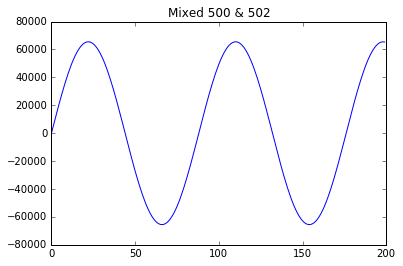

In [5]:
%matplotlib inline
from pylab import *
import wave
import struct
import random

# Config for audio.
samplingRate = 44100
numSamples = 2 * 44100
numCycles = numSamples / samplingRate
maxVol= 2**15 - 1.0 # maximum amplitude

time_space = linspace(0, numCycles, numSamples)

x_500 = 1 * sin(2 * pi * 500 * time_space) * maxVol
x_502 = 1 * sin(2 * pi * 502 * time_space) * maxVol
x_total = [x_500[i] + x_502[i] for i in range(0, len(x_500))]

# Plot
figure()
title("Mixed 500 & 502")
plot(time_space[0:200] * samplingRate, x_total[0:200])

# Create the audio file.
audio_file = wave.open('wavs/1b.wav', 'w')
audio_file.setparams((1, 2, samplingRate, numSamples, "NONE", "Uncompressed"))
for i in x_total:
    packed_value = struct.pack('h', int16(i))
    audio_file.writeframes(packed_value)
audio_file.close()

Spectrogram:

![](images/1b.png)

It sounds like a beeping with a bit of an echo. I believe this is the concept of "Beating" as discussed in the slides/lectures.

## 1.c (\*)

Read about the concept of signal to noise ratio (SNR). Write a function that takes as input a SNR in decibels (dB) and a frequency in Hz in order to generate a mixture of white noise and a 440 sine wave. Generate 2 seconds of the corresponding audio and view/listen to it in Audacity.

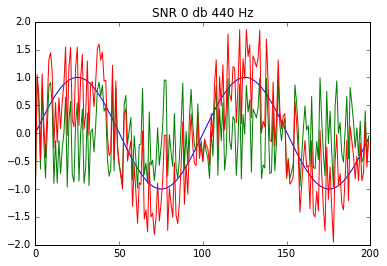

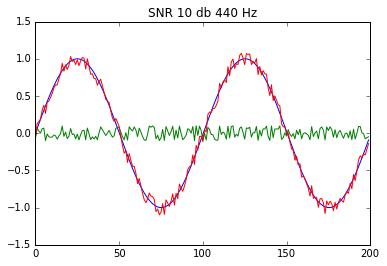

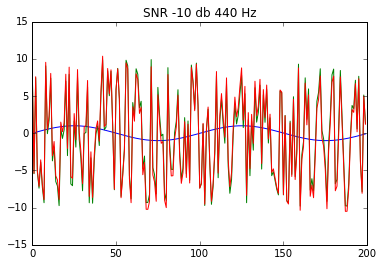

In [15]:
%matplotlib inline
from pylab import *
import sympy
import wave
import struct
import numpy

# Config for audio.
samplingRate = 44100
numSamples = 2 * 44100
numCycles = numSamples / samplingRate

# Audio config
maxVol= 2**15 - 1.0 # maximum amplitude

time_space = linspace(0, numCycles, numSamples)

def problem_1_c(snr_in_decibels, frequency_in_hz):
    # Generate Signal
    signal_power = 1
    signal_wave = signal_power * sin(2 * pi * frequency_in_hz * time_space)
    # Generate Noise.
    p_noise, p_signal, snr = sympy.symbols("p_noise, p_signal, snr")
    noise_power = sympy.solve(sympy.Eq(10 * sympy.log(p_signal / p_noise, 10), snr), p_noise)[0].evalf(subs = {
        p_signal: signal_power,
        snr: snr_in_decibels
    })
    noise_wave = ((numpy.random.ranf(size = numSamples) * 2) - 1) * noise_power
    # Plot
    figure()
    title("SNR " + str(snr_in_decibels) + " db " + str(frequency_in_hz) + " Hz")
    plot(time_space[0:200] * samplingRate, signal_wave[0:200])
    plot(time_space[0:200] * samplingRate, noise_wave[0:200])
    plot(time_space[0:200] * samplingRate, noise_wave[0:200] + signal_wave[0:200])
    # Create the audio file.
    audio_file = wave.open('wavs/1c-' + str(snr_in_decibels) + '-' + str(frequency_in_hz) + '.wav', 'w')
    audio_file.setparams((1, 2, samplingRate, numSamples, "NONE", "Uncompressed"))
    for i in noise_wave + signal_wave:
        packed_value = struct.pack('h', int16(i * maxVol))
        audio_file.writeframes(packed_value)
    audio_file.close()

problem_1_c(0, 440)
problem_1_c(10, 440)
problem_1_c(-10, 440)

## 1.d (\*\*)

Consider a mixture of 3 harmonically related sinusoids as the ones you created.  What you would like to devise is a process to estimate the amplitudes of each sine wave assuming that you know the frequencies that the mixture is composed of.  Try taking the inner product of a mixture with a unit amplitude sinusoid of frequency $f$, then take the inner product of the mixture with a unit amplitude sinusoid of frequency $2f$. Make sure that the phases of the "probing" sinusoid are the same as the phases of the mixture sinusoids.  What do you observe about the inner products ?  Describe how you could modify this procedure to estimate the amplitude of mixtures of 4 sinusoids mixed with noise.

In [37]:
%matplotlib inline
from pylab import *
import numpy
import wave
import struct
import random

# Config for audio.
samplingRate = 44100
numSamples = 2 * 44100
numCycles = numSamples / samplingRate
frequency = 440

time_space = linspace(0, numCycles, numSamples)

# Audio config
amplitude = 0.8
phase = 0.0
maxVol= 2**15 - 1.0 # maximum amplitude

mixture = numpy.array(problem_1_a(1.0, 0.0, 0.5, 0.0, 0.33, 0.0))

# plot(time_space[0:200], mixture[0:200])

x_1 = numpy.array(1.0 * sin(2 * pi * frequency * time_space + 0.0) * maxVol)
inner_product_1 = mixture.dot(x_1)
print("Similar to first wave:", inner_product_1)

x_2 = .5 * sin(2 * pi * 2*frequency * time_space + 0.0) * maxVol
inner_product_2 = mixture.dot(x_2)
print("Similar to second wave:", inner_product_2)

x_3 = .33 * sin(2 * pi * 3*frequency * time_space + 0.0) * maxVol
inner_product_3 = mixture.dot(x_3)
print("Similar to second wave:", inner_product_3)

## Bads

x_diff_freq = 1 * sin(2 * pi * 4*frequency * time_space + 0.0) * maxVol
inner_product_diff_freq = mixture.dot(x_diff_freq)
print("Different freq (4f):", inner_product_diff_freq)

x_diff_amp = 4 * sin(2 * pi * frequency * time_space + 0.0) * maxVol
inner_product_diff_amp = mixture.dot(x_diff_amp)
print("Different amplitude (4):", inner_product_diff_amp)

x_diff_phase = 1 * sin(2 * pi * 2*frequency * time_space + (pi/2)) * maxVol
inner_product_diff_phase = mixture.dot(x_diff_phase)
print("Different phase pi/2:", inner_product_diff_phase)

x_diff_phase_2 = .5 * sin(2 * pi * 2*frequency * time_space + (3*pi / 2)) * maxVol
inner_product_diff_phase_2 = mixture.dot(x_diff_phase_2)
print("Different phase 3pi/2:", inner_product_diff_phase_2)

Similar to first wave: 4.73485875068e+13
Similar to second wave: 1.18371468767e+13
Similar to second wave: 5.15626117949e+12
Different freq (4f): -0.0105014368892
Different amplitude (4): 1.89394350027e+14
Different phase pi/2: 2.49360596846
Different phase 3pi/2: -2.93639600133


It is observed that the inner product on waves of the correct frequency produces extremely large numbers, while incorrect frequencies produce small numbers close to zero.

One method for determining the amplitude of the four sinewave mixture would be to test over a range of frequencies and look for large values.

## 1.e (\*\*\*)

Now let's make the scenario a little bit more challenging. We still know the frequencies of the mixture but we want to estimate not only the amplitudes but also the phases. Observe what happens with the inner products when the phase is not zero.  Plot the inner products of the input mixture for all possible phase shifts of the probing sinusoid. On that plot do you notice anything different about the "correct" phase ?  Based on your observation describe and also implement an algorithm for estimating both amplitudes and phases.  Show using one or more examples how it works.

# Problem 2

The goal of this question is to explore one of the most important tools in music information retrievial, signal processing, and engineering in general the Discrete Fourier Transform (DFT) and its computationally effcient implementation the Fast Fourier Transform. In addition we will continue looking into audio programming and processing sound in buffers.

## 2.a (\*)

Write code to read/write data from a .wav file (you can use a  library)  in  buffers  of  2048.   Verify  that  your  code  can  read,  apply simple processing (like a gain) and write audio files correctly.

In [25]:
%matplotlib inline
from pylab import *
import sympy
import wave
import struct
import numpy

buffer_size = 2048
audio_file = wave.open('wavs/1a_0_phase.wav', 'r')
out_file = wave.open('wavs/2a.wav', 'w')

out_file.setparams(audio_file.getparams())

num_of_frames = buffer_size / (audio_file.getsampwidth() + audio_file.getnchannels())

while True:
    frames = audio_file.readframes(int(num_of_frames))
    if not frames:
        break
    new_frames = bytearray(frames)
    for idx in range(0, len(new_frames)):
        # Simple Gain
        if new_frames[idx] is not 255:
            new_frames[idx] += 1
    out_file.writeframes(new_frames)
    

## 2.b (\*)

Using any library or implementation of the Fast Fourier Transform for your programming language calculate the frequency domain complex spectrum of the 3 component mixture signal from question 1. Plot the magnitude spectrum.

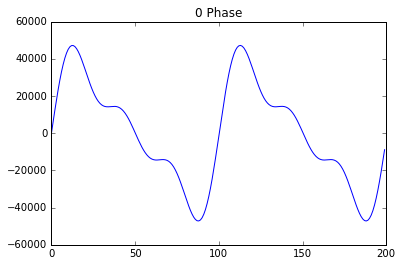

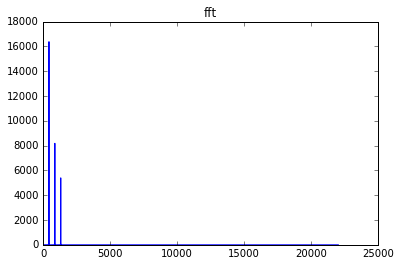

In [86]:
%matplotlib inline
from pylab import *
import wave
import struct
import random
import numpy

# Config for audio.
samplingRate = 44100
numSamples = 2 * 44100
numCycles = numSamples / samplingRate
frequency = 440
maxVol= 2**15 - 1.0 # maximum amplitude

time_space = linspace(0, numCycles, numSamples)

def problem_1_a(amp_1, phase_1, amp_2, phase_2, amp_3, phase_3):
    # Build the sinewaves.
    x_1 = amp_1 * sin(2 * pi * frequency * time_space + phase_1) * maxVol
    x_2 = amp_2 * sin(2 * pi * 2*frequency * time_space + phase_2) * maxVol
    x_3 = amp_3 * sin(2 * pi * 3*frequency * time_space + phase_3) * maxVol
    return [x_1[i] + x_2[i] + x_3[i] for i in range(0, len(x_1))]

x_space_0_phase = problem_1_a(1.0, 0.0, 0.5, 0.0, 0.33, 0.0)

# Create the plot.
figure()
title("0 Phase")
plot(time_space[0:200] * samplingRate, x_space_0_phase[0:200]);

size_fft = len(x_space_0_phase)
fft_space = (numpy.fft.fft(x_space_0_phase) / size_fft)[0 : int(size_fft / 2)]

figure()
title("fft")

##
size = len(x_space_0_phase)
series = arange(size)
intervals = size / samplingRate
freq = (series / intervals)[0 : int(size / 2)]
##

plot(freq, numpy.abs(fft_space))

## 2.c (\*)

Using a programming language of your choice write code to directly compute the Discrete Fourier Transform (DFT) of an input array. You should express everything directly at low level using array access, for loops, and arithmetic operations i.e do not use a complex number type if the language supports it, and do not use any matrix multiplication facilities. Provide a listing of your code and a plot showing that your algorithm produces the same magnitude response as a Fast Fourier Transform routine in your language of choice that is either built in or freely available. Verify that your output is identical with the one by the FFT implementation you used.

Written Code in Rust with test:

```rust
use std::f32::consts::PI;
use std::ops::{Add, Mul, Sub};

const NUM_SAMPLES: usize = 2048;

// FFT Details

fn fft(signal: &[Complex]) -> Vec<Complex> {
    // Stopping condition.
    if signal.len() <= 1 {
        return signal.to_vec()
    }

    // Build the stride buffers.
    let (mut evens, mut odds) = (
        Vec::with_capacity(signal.len() / 2),
        Vec::with_capacity(signal.len() / 2)
    );

    // Make even and odd strides.
    for (tick, value) in signal.iter().enumerate() {
        if tick % 2 == 0 {
            evens.push(value.clone())
        } else {
            odds.push(value.clone())
        }
    }

    // Recurse
    let evens_fft = fft(&evens[..]);
    let odds_fft = fft(&odds[..]);

    // Build the output spectrum.
    let mut spectrum = vec![
        Complex::new(0.0, 0.0);
        signal.len()
    ];
    
    // Process.
    for index in 0..signal.len() / 2 {
        // Determine the twiddle value.
        let twiddle = Complex::from_polar(
            1.0,
            -2.0 * PI * (index as f32) / (signal.len() as f32)
        );
        spectrum[index] = evens_fft[index] + (twiddle * odds_fft[index]);
        spectrum[index + (signal.len() / 2)] = evens_fft[index] - (twiddle * odds_fft[index]);
    }

    // Pass back.
    spectrum
}

// Complex Number Details
#[derive(Debug, Clone, Copy)]
struct Complex {
    real:      f32,
    imaginary: f32,
}

// A simple partial implementation of what we can find in `num`
impl Complex {
    #[inline]
    fn new(real: f32, imaginary: f32) -> Self {
        Complex {
            real: real,
            imaginary: imaginary,
        }
    }
    
    #[inline]
    fn from_polar(r: f32, theta: f32) -> Complex {
        Complex {
            real: r * theta.cos(),
            imaginary: r * theta.sin(),
        }
    }

    /// Returns the square of the norm (since `T` doesn't necessarily
    /// have a sqrt function), i.e. `re^2 + im^2`.
    #[inline]
    fn norm_sqr(&self) -> f32 {
        self.real.clone() * self.real.clone() + self.imaginary.clone() * self.imaginary.clone()
    }
}

// (a + i b) + (c + i d) == (a + c) + i (b + d)
impl Add<Complex> for Complex {
    type Output = Complex;

    #[inline]
    fn add(self, other: Complex) -> Complex {
        Complex::new(self.real + other.real, self.imaginary + other.imaginary)
    }
}

// (a + i b) * (c + i d) == (a*c - b*d) + i (a*d + b*c)
impl Mul<Complex> for Complex {
    type Output = Complex;

    #[inline]
    fn mul(self, other: Complex) -> Complex {
        let real = self.real.clone() * other.real.clone() - self.imaginary.clone() * other.imaginary.clone();
        let imaginary = self.real * other.imaginary + self.imaginary * other.real;
        Complex::new(real, imaginary)
    }
}

// (a + i b) - (c + i d) == (a - c) + i (b - d)
impl Sub<Complex> for Complex {
    type Output = Complex;

    #[inline]
    fn sub(self, other: Complex) -> Complex {
        Complex::new(self.real - other.real, self.imaginary - other.imaginary)
    }
}

// Test

#[cfg(test)]
mod test {
    use super::fft;
    use Complex;

    #[test]
    fn transform() {
        let test = [
            Complex::new(1f32, 0f32),
            Complex::new(1f32, 0f32),
            Complex::new(1f32, 0f32),
            Complex::new(1f32, 0f32),
            Complex::new(0f32, 0f32),
            Complex::new(0f32, 0f32),
            Complex::new(0f32, 0f32),
            Complex::new(0f32, 0f32)
        ];
        let target = [
            Complex::new(4f32, 0f32),
            Complex::new(1f32, -2.414f32),
            Complex::new(0f32, 0f32),
            Complex::new(1f32, -0.414f32),
            Complex::new(0f32, 0f32),
            Complex::new(1f32, 0.414f32),
            Complex::new(0f32, 0f32),
            Complex::new(1f32, 2.414f32)
        ];

        let test_fft = fft(&test);
        println!("Want: {:?}", target.to_vec());
        println!("Got:  {:?}", test_fft);
        for (test_item, target_item) in test_fft.iter().zip(target.iter()) {
            assert!((*test_item - *target_item).norm_sqr() < 1e-6);
        }
    }
}

```

Using a library with the same `test` and `target`:

```rust
extern crate rustfft;
extern crate num;

#[cfg(test)]
mod test {
    use num::complex::Complex;
    use rustfft;

    #[test]
    fn transform() {
        // This library can handle arbitrary FFT lengths, but
        // lengths that are highly composite run much faster.
        let fft_len = 8;

        let test = [
            Complex::new(1f32, 0f32),
            Complex::new(1f32, 0f32),
            Complex::new(1f32, 0f32),
            Complex::new(1f32, 0f32),
            Complex::new(0f32, 0f32),
            Complex::new(0f32, 0f32),
            Complex::new(0f32, 0f32),
            Complex::new(0f32, 0f32)
        ];
        let target = [
            Complex::new(4f32, 0f32),
            Complex::new(1f32, -2.414f32),
            Complex::new(0f32, 0f32),
            Complex::new(1f32, -0.414f32),
            Complex::new(0f32, 0f32),
            Complex::new(1f32, 0.414f32),
            Complex::new(0f32, 0f32),
            Complex::new(1f32, 2.414f32)
        ];

        let mut fft = rustfft::FFT::new(fft_len, false);
        let mut test_fft = test.clone();
        fft.process(&test, &mut test_fft);
        
        println!("Want: {:?}", target.to_vec());
        println!("Got:  {:?}", test_fft);
        
        for (test_item, target_item) in test_fft.iter().zip(target.iter()) {
            assert!((*test_item - *target_item).norm_sqr() < 1e-6);
        }
    }
}
```

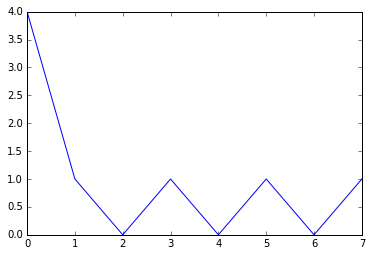

In [6]:
%matplotlib inline
from pylab import *
# Since we know both codes produce the same output on a given input, just plot the spectrum to satisfy the question.
time = range(0,8)
results = [4,1,0,1,0,1,0,1]
plot(time, results)

## 2.d (\*\*)

* Modify the code that reads/writes data in buffers so that each buffer is converted to a frequency domain complex spectrum. 
* Compute magnitude and phase spectrum for each buffer and plot an example for each type. 
* Convert the magnitude and phase spectra back to a complex spectrum and then using the inverse DFT return to the time domain and write the buffer to an audio file. 
* If everything is working correctly you should get back the original audio.
* Once you have verified that's the case then you can perform some simple spectral processing. 
* Replace the phase spectrum with appropriate random numbers uniformly distributed. 
* How is the resulting audio affected? 
* Try to describe what you hear especially when processing pieces of music.
* Experiment with large windows corresponding to 3-5 seconds. What happens?

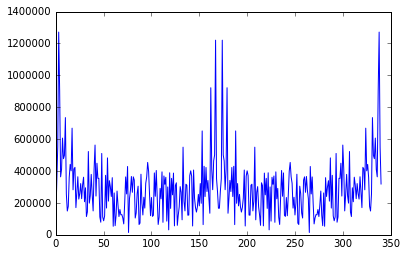

8.24039539765e-11 == 0.0
-5376.0 == -5376.0
6123.0 == 6123.0
26391.0 == 26391.0
12135.0 == 12135.0
1583.0 == 1583.0
17926.0 == 17926.0
25670.0 == 25670.0
23396.0 == 23396.0
8539.0 == 8539.0
28449.0 == 28449.0
-5265.0 == -5265.0
-32533.0 == -32533.0
32384.0 == 32384.0
-28546.0 == -28546.0
-23664.0 == -23664.0
-25181.0 == -25181.0
13725.0 == 13725.0
-22475.0 == -22475.0
8104.0 == 8104.0
-20449.0 == -20449.0
24240.0 == 24240.0
-19106.0 == -19106.0
181.0 == 181.0
-18432.0 == -18432.0
8888.0 == 8888.0
-18398.0 == -18398.0
-3912.0 == -3912.0
-18960.0 == -18960.0
-22859.0 == -22859.0
-20058.0 == -20058.0
-31055.0 == -31055.0
-21626.0 == -21626.0
-8533.0 == -8533.0
-23586.0 == -23586.0
163.0 == 163.0
-25856.0 == -25856.0
17563.0 == 17563.0
-28348.0 == -28348.0
-367.0 == -367.0
-30978.0 == -30978.0
-31866.0 == -31866.0
31875.0 == 31875.0
8828.0 == 8828.0
29218.0 == 29218.0
8818.0 == 8818.0
26658.0 == 26658.0
-15768.0 == -15768.0
24258.0 == 24258.0
13918.0 == 13918.0
22070.0 == 22070.0
-23466.0 

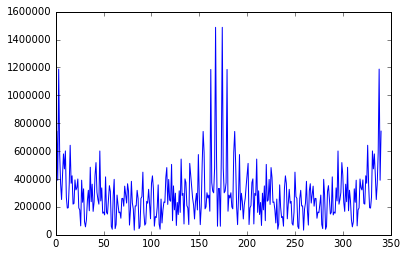

29870.0 == 29870.0
-26764.0 == -26764.0
27287.0 == 27287.0
11626.0 == 11626.0
24877.0 == 24877.0
-14495.0 == -14495.0
22727.0 == 22727.0
-18344.0 == -18344.0
20920.0 == 20920.0
21329.0 == 21329.0
19539.0 == 19539.0
-7860.0 == -7860.0
18657.0 == 18657.0
-24248.0 == -24248.0
18337.0 == 18337.0
-14009.0 == -14009.0
18633.0 == 18633.0
32584.0 == 32584.0
19583.0 == 19583.0
-9396.0 == -9396.0
21211.0 == 21211.0
-7598.0 == -7598.0
23522.0 == 23522.0
-30117.0 == -30117.0
26506.0 == 26506.0
-18329.0 == -18329.0
30136.0 == 30136.0
16245.0 == 16245.0
-31169.0 == -31169.0
-7290.0 == -7290.0
-26397.0 == -26397.0
22680.0 == 22680.0
-21160.0 == -21160.0
18605.0 == 18605.0
-15544.0 == -15544.0
20675.0 == 20675.0
-9648.0 == -9648.0
2266.0 == 2266.0
-3576.0 == -3576.0
242.0 == 242.0
2560.0 == 2560.0
-13814.0 == -13814.0
8650.0 == 8650.0
-2271.0 == -2271.0
14583.0 == 14583.0
7224.0 == 7224.0
20252.0 == 20252.0
-10673.0 == -10673.0
25558.0 == 25558.0
-12957.0 == -12957.0
30413.0 == 30413.0
-19850.0 == -19

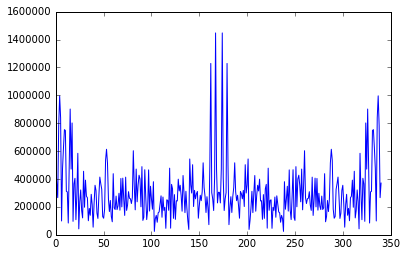

-14251.0 == -14251.0
-17208.0 == -17208.0
-14404.0 == -14404.0
-23609.0 == -23609.0
-14429.0 == -14429.0
-8505.0 == -8505.0
-14370.0 == -14370.0
15559.0 == 15559.0
-14276.0 == -14276.0
-30776.0 == -30776.0
-14201.0 == -14201.0
-29496.0 == -29496.0
-14196.0 == -14196.0
5320.0 == 5320.0
-14316.0 == -14316.0
-3896.0 == -3896.0
-14608.0 == -14608.0
-2362.0 == -2362.0
-15114.0 == -15114.0
452.0 == 452.0
-15871.0 == -15871.0
-1598.0 == -1598.0
-16903.0 == -16903.0
-12099.0 == -12099.0
-18224.0 == -18224.0
-31816.0 == -31816.0
-19837.0 == -19837.0
7858.0 == 7858.0
-21730.0 == -21730.0
-18005.0 == -18005.0
-23879.0 == -23879.0
31138.0 == 31138.0
-26247.0 == -26247.0
-28519.0 == -28519.0
-28784.0 == -28784.0
14991.0 == 14991.0
-31430.0 == -31430.0
-16763.0 == -16763.0
31422.0 == 31422.0
27258.0 == 27258.0
28778.0 == 28778.0
-28560.0 == -28560.0
26256.0 == 26256.0
-30618.0 == -30618.0
23944.0 == 23944.0
-22691.0 == -22691.0
21927.0 == 21927.0
16469.0 == 16469.0
20288.0 == 20288.0
-23985.0 == -23

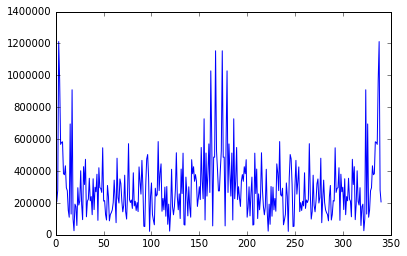

13212.0 == 13212.0
31539.0 == 31539.0
12411.0 == 12411.0
30512.0 == 30512.0
11383.0 == 11383.0
-27604.0 == -27604.0
10132.0 == 10132.0
-8409.0 == -8409.0
8671.0 == 8671.0
28193.0 == 28193.0
7022.0 == 7022.0
24603.0 == 24603.0
5216.0 == 5216.0
-9452.0 == -9452.0
3291.0 == 3291.0
2572.0 == 2572.0
1290.0 == 1290.0
7173.0 == 7173.0
-740.0 == -740.0
16125.0 == 16125.0
-2754.0 == -2754.0
-24331.0 == -24331.0
-4704.0 == -4704.0
28397.0 == 28397.0
-6546.0 == -6546.0
-12058.0 == -12058.0
-8240.0 == -8240.0
-6689.0 == -6689.0
-9755.0 == -9755.0
-14375.0 == -14375.0
-11065.0 == -11065.0
-31020.0 == -31020.0
-12154.0 == -12154.0
10192.0 == 10192.0
-13017.0 == -13017.0
-22323.0 == -22323.0
-13656.0 == -13656.0
-1590.0 == -1590.0
-14087.0 == -14087.0
968.0 == 968.0
-14333.0 == -14333.0
-23352.0 == -23352.0
-14428.0 == -14428.0
-19257.0 == -19257.0
-14412.0 == -14412.0
1223.0 == 1223.0
-14332.0 == -14332.0
24776.0 == 24776.0
-14240.0 == -14240.0
-27192.0 == -27192.0
-14187.0 == -14187.0
27848.0 == 27

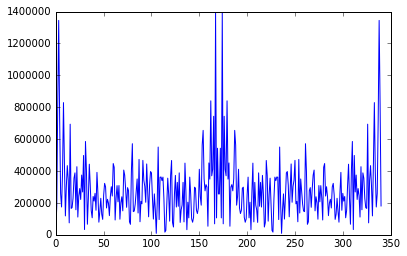

29495.0 == 29495.0
10867.0 == 10867.0
26922.0 == 26922.0
-18583.0 == -18583.0
24503.0 == 24503.0
4703.0 == 4703.0
22290.0 == 22290.0
25687.0 == 25687.0
20324.0 == 20324.0
-13745.0 == -13745.0
18634.0 == 18634.0
20808.0 == 20808.0
17233.0 == 17233.0
-1213.0 == -1213.0
16123.0 == 16123.0
-16834.0 == -16834.0
15294.0 == 15294.0
-32197.0 == -32197.0
14722.0 == 14722.0
10297.0 == 10297.0
14376.0 == 14376.0
-30920.0 == -30920.0
14215.0 == 14215.0
28215.0 == 28215.0
14190.0 == 14190.0
-21449.0 == -21449.0
14252.0 == 14252.0
2615.0 == 2615.0
14346.0 == 14346.0
21560.0 == 21560.0
14420.0 == 14420.0
22072.0 == 22072.0
14422.0 == 14422.0
-7112.0 == -7112.0
14308.0 == 14308.0
-11209.0 == -11209.0
14036.0 == 14036.0
2102.0 == 2102.0
13576.0 == 13576.0
26933.0 == 26933.0
12905.0 == 12905.0
-5582.0 == -5582.0
12010.0 == 12010.0
-30674.0 == -30674.0
10888.0 == 10888.0
19242.0 == 19242.0
9547.0 == 9547.0
17445.0 == 17445.0
8004.0 == 8004.0
-29153.0 == -29153.0
6286.0 == 6286.0
18968.0 == 18968.0
4426.0

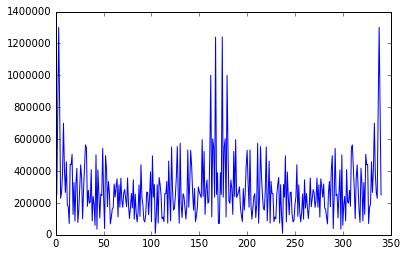

13966.0 == 13966.0
-11210.0 == -11210.0
19668.0 == 19668.0
-17844.0 == -17844.0
25018.0 == 25018.0
-7071.0 == -7071.0
29924.0 == 29924.0
1140.0 == 1140.0
-31228.0 == -31228.0
-9594.0 == -9594.0
-27430.0 == -27430.0
13972.0 == 13972.0
-24266.0 == -24266.0
-2655.0 == -2655.0
-21771.0 == -21771.0
2730.0 == 2730.0
-19958.0 == -19958.0
30642.0 == 30642.0
-18825.0 == -18825.0
19894.0 == 19894.0
-18355.0 == -18355.0
-20296.0 == -20296.0
-18512.0 == -18512.0
-11849.0 == -11849.0
-19247.0 == -19247.0
-4940.0 == -4940.0
-20500.0 == -20500.0
19119.0 == 19119.0
-22198.0 == -22198.0
14505.0 == 14505.0
-24264.0 == -24264.0
3233.0 == 3233.0
-26612.0 == -26612.0
7064.0 == 7064.0
-29157.0 == -29157.0
-17266.0 == -17266.0
-31812.0 == -31812.0
16771.0 == 16771.0
31041.0 == 31041.0
-2183.0 == -2183.0
28407.0 == 28407.0
9070.0 == 9070.0
25891.0 == 25891.0
101.0 == 101.0
23552.0 == 23552.0
-16804.0 == -16804.0
21438.0 == 21438.0
-32429.0 == -32429.0
19585.0 == 19585.0
24140.0 == 24140.0
18014.0 == 18014.0
2

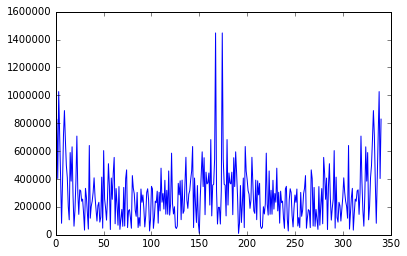

24176.0 == 24176.0
27486.0 == 27486.0
22123.0 == 22123.0
-9898.0 == -9898.0
20441.0 == 20441.0
2127.0 == 2127.0
19208.0 == 19208.0
15947.0 == 15947.0
18494.0 == 18494.0
-18104.0 == -18104.0
18361.0 == 18361.0
-21945.0 == -21945.0
18858.0 == 18858.0
12617.0 == 12617.0
20017.0 == 20017.0
24910.0 == 24910.0
21857.0 == 21857.0
15445.0 == 15445.0
24380.0 == 24380.0
-20129.0 == -20129.0
27569.0 == 27569.0
-24725.0 == -24725.0
31391.0 == 31391.0
-10630.0 == -10630.0
-29738.0 == -29738.0
5003.0 == 5003.0
-24813.0 == -24813.0
2207.0 == 2207.0
-19448.0 == -19448.0
23220.0 == 23220.0
-13734.0 == -13734.0
-23094.0 == -23094.0
-7771.0 == -7771.0
32225.0 == 32225.0
-1667.0 == -1667.0
29433.0 == 29433.0
4466.0 == 4466.0
5905.0 == 5905.0
10519.0 == 10519.0
-727.0 == -727.0
16381.0 == 16381.0
-17345.0 == -17345.0
21948.0 == 21948.0
-3499.0 == -3499.0
27122.0 == 27122.0
19561.0 == 19561.0
31820.0 == 31820.0
32636.0 == 32636.0
-29569.0 == -29569.0
20876.0 == 20876.0
-26031.0 == -26031.0
-26214.0 == -2621

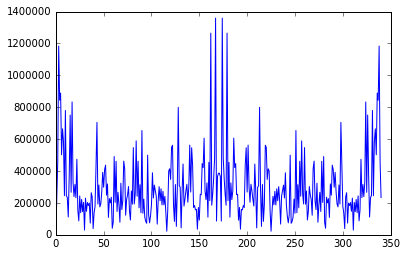

-14418.0 == -14418.0
-1337.0 == -1337.0
-14342.0 == -14342.0
22727.0 == 22727.0
-14248.0 == -14248.0
-27704.0 == -27704.0
-14189.0 == -14189.0
30408.0 == 30408.0
-14218.0 == -14218.0
-12600.0 == -12600.0
-14386.0 == -14386.0
27591.0 == 27591.0
-14741.0 == -14741.0
9926.0 == 9926.0
-15322.0 == -15322.0
-8508.0 == -8508.0
-16162.0 == -16162.0
32192.0 == 32192.0
-17283.0 == -17283.0
-1860.0 == -1860.0
-18696.0 == -18696.0
21430.0 == 21430.0
-20397.0 == -20397.0
-25680.0 == -25680.0
-22373.0 == -22373.0
-4696.0 == -4696.0
-24595.0 == -24595.0
29343.0 == 29343.0
-27022.0 == -27022.0
24726.0 == 24726.0
-29600.0 == -29600.0
-2164.0 == -2164.0
-32265.0 == -32265.0
32385.0 == 32385.0
30590.0 == 30590.0
18295.0 == 18295.0
27975.0 == 27975.0
-22931.0 == -22931.0
25510.0 == 25510.0
-3997.0 == -3997.0
23280.0 == 23280.0
31834.0 == 31834.0
21372.0 == 21372.0
-25517.0 == -25517.0
19868.0 == 19868.0
-25779.0 == -25779.0
18843.0 == 18843.0
-17079.0 == -17079.0
18365.0 == 18365.0
14919.0 == 14919.0
1849

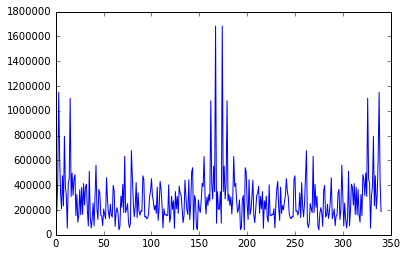

11017.0 == 11017.0
-7381.0 == -7381.0
9699.0 == 9699.0
-4059.0 == -4059.0
8176.0 == 8176.0
19231.0 == 19231.0
6475.0 == 6475.0
5145.0 == 5145.0
4628.0 == 4628.0
29202.0 == 29202.0
2674.0 == 2674.0
-27894.0 == -27894.0
659.0 == 659.0
-23294.0 == -23294.0
-1371.0 == -1371.0
-10502.0 == -10502.0
-3370.0 == -3370.0
22002.0 == 22002.0
-5291.0 == -5291.0
19947.0 == 19947.0
-7091.0 == -7091.0
-7196.0 == -7196.0
-8733.0 == -8733.0
14045.0 == 14045.0
-10186.0 == -10186.0
23512.0 == 23512.0
-11429.0 == -11429.0
25043.0 == 25043.0
-12447.0 == -12447.0
18895.0 == 18895.0
-13239.0 == -13239.0
3532.0 == 3532.0
-13811.0 == -13811.0
-25910.0 == -25910.0
-14182.0 == -14182.0
-10296.0 == -10296.0
-14377.0 == -14377.0
-24633.0 == -24633.0
-14433.0 == -14433.0
-14137.0 == -14137.0
-14392.0 == -14392.0
8903.0 == 8903.0
-14302.0 == -14302.0
30920.0 == 30920.0
-14216.0 == -14216.0
-27192.0 == -27192.0
-14187.0 == -14187.0
17608.0 == 17608.0
-14268.0 == -14268.0
21448.0 == 21448.0
-14509.0 == -14509.0
-26681.

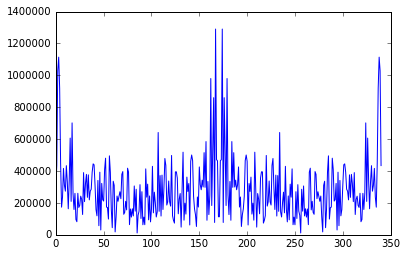

23789.0 == 23789.0
-28068.0 == -28068.0
21650.0 == 21650.0
14420.0 == 14420.0
19768.0 == 19768.0
-2483.0 == -2483.0
18166.0 == 18166.0
-9914.0 == -9914.0
16857.0 == 16857.0
-9151.0 == -9151.0
15836.0 == 15836.0
-3523.0 == -3523.0
15090.0 == 15090.0
58.0 == 58.0
14592.0 == 14592.0
-7111.0 == -7111.0
14308.0 == 14308.0
29495.0 == 29495.0
14195.0 == 14195.0
31543.0 == 31543.0
14203.0 == 14203.0
-14281.0 == -14281.0
14280.0 == 14280.0
9783.0 == 9783.0
14374.0 == 14374.0
24120.0 == 24120.0
14430.0 == 14430.0
16696.0 == 16696.0
14401.0 == 14401.0
-24264.0 == -24264.0
14241.0 == 14241.0
23095.0 == 23095.0
13914.0 == 13914.0
20278.0 == 20278.0
13391.0 == 13391.0
27444.0 == 27444.0
12651.0 == 12651.0
-23247.0 == -23247.0
11685.0 == 11685.0
-467.0 == -467.0
10494.0 == 10494.0
32552.0 == 32552.0
9087.0 == 9087.0
16163.0 == 16163.0
7487.0 == 7487.0
22557.0 == 22557.0
5720.0 == 5720.0
-4074.0 == -4074.0
3824.0 == 3824.0
12046.0 == 12046.0
1839.0 == 1839.0
17415.0 == 17415.0
-188.0 == -188.0
24063.0

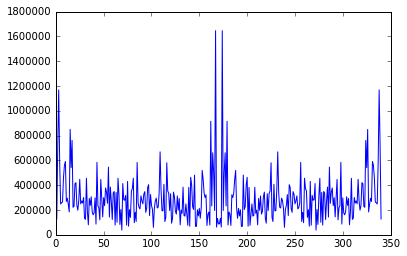

26597.0 == 26597.0
29799.0 == 29799.0
31348.0 == 31348.0
-7046.0 == -7046.0
-29980.0 == -29980.0
-1654.0 == -1654.0
-26375.0 == -26375.0
-30824.0 == -30824.0
-23417.0 == -23417.0
29604.0 == 29604.0
-21133.0 == -21133.0
-19539.0 == -19539.0
-19533.0 == -19533.0
20403.0 == 20403.0
-18609.0 == -18609.0
23991.0 == 23991.0
-18339.0 == -18339.0
1976.0 == 1976.0
-18681.0 == -18681.0
32695.0 == 32695.0
-19585.0 == -19585.0
2227.0 == 2227.0
-20984.0 == -20984.0
-5458.0 == -5458.0
-22806.0 == -22806.0
30630.0 == 30630.0
-24969.0 == -24969.0
1438.0 == 1438.0
-27387.0 == -27387.0
-5739.0 == -5739.0
-29975.0 == -29975.0
30858.0 == 30858.0
-32648.0 == -32648.0
1152.0 == 1152.0
30212.0 == 30212.0
-10122.0 == -10122.0
27608.0 == 27608.0
13675.0 == 13675.0
25141.0 == 25141.0
21602.0 == 21602.0
22868.0 == 22868.0
24665.0 == 24665.0
20832.0 == 20832.0
31057.0 == 31057.0
19065.0 == 19065.0
-20406.0 == -20406.0
17584.0 == 17584.0
3140.0 == 3140.0
16396.0 == 16396.0
-31680.0 == -31680.0
15492.0 == 15492.0
1

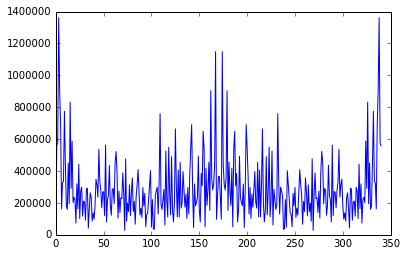

20005.0 == 20005.0
-4274.0 == -4274.0
18927.0 == 18927.0
-11191.0 == -11191.0
18388.0 == 18388.0
3911.0 == 3911.0
18447.0 == 18447.0
-13752.0 == -13752.0
19146.0 == 19146.0
9290.0 == 9290.0
20516.0 == 20516.0
10832.0 == 10832.0
22570.0 == 22570.0
-10664.0 == -10664.0
25302.0 == 25302.0
5474.0 == 5474.0
28693.0 == 28693.0
-16272.0 == -16272.0
32704.0 == 32704.0
-24705.0 == -24705.0
-28257.0 == -28257.0
28561.0 == 28561.0
-23185.0 == -23185.0
-9307.0 == -9307.0
-17701.0 == -17701.0
-31302.0 == -31302.0
-11899.0 == -11899.0
2001.0 == 2001.0
-5881.0 == -5881.0
-2839.0 == -2839.0
244.0 == 244.0
-8960.0 == -8960.0
6365.0 == 6365.0
21016.0 == 21016.0
12370.0 == 12370.0
-6352.0 == -6352.0
18151.0 == 18151.0
13638.0 == 13638.0
23605.0 == 23605.0
-8100.0 == -8100.0
28640.0 == 28640.0
-27281.0 == -27281.0
-32363.0 == -32363.0
4225.0 == 4225.0
-28400.0 == -28400.0
7057.0 == 7057.0
-25061.0 == -25061.0
-27746.0 == -27746.0
-22381.0 == -22381.0
25000.0 == 25000.0
-20383.0 == -20383.0
-31056.0 == -31

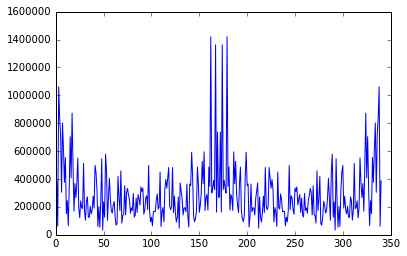

-14224.0 == -14224.0
-26936.0 == -26936.0
-14186.0 == -14186.0
21448.0 == 21448.0
-14253.0 == -14253.0
30408.0 == 30408.0
-14474.0 == -14474.0
-11833.0 == -11833.0
-14895.0 == -14895.0
16069.0 == 16069.0
-15554.0 == -15554.0
-24381.0 == -24381.0
-16480.0 == -16480.0
-6721.0 == -6721.0
-17691.0 == -17691.0
1466.0 == 1466.0
-19195.0 == -19195.0
2229.0 == 2229.0
-20984.0 == -20984.0
-82.0 == -82.0
-23041.0 == -23041.0
3493.0 == 3493.0
-25331.0 == -25331.0
23965.0 == 23965.0
-27811.0 == -27811.0
10387.0 == 10387.0
-30424.0 == -30424.0
-19831.0 == -19831.0
32434.0 == 32434.0
17790.0 == 17790.0
29765.0 == 29765.0
13428.0 == 13428.0
27188.0 == 27188.0
-11670.0 == -11670.0
24786.0 == 24786.0
30816.0 == 30816.0
22648.0 == 22648.0
31064.0 == 31064.0
20857.0 == 20857.0
9809.0 == 9809.0
19494.0 == 19494.0
-14004.0 == -14004.0
18633.0 == 18633.0
-24248.0 == -24248.0
18337.0 == 18337.0
-7353.0 == -7353.0
18659.0 == 18659.0
-19640.0 == -19640.0
19635.0 == 19635.0
10828.0 == 10828.0
21290.0 == 21290.0

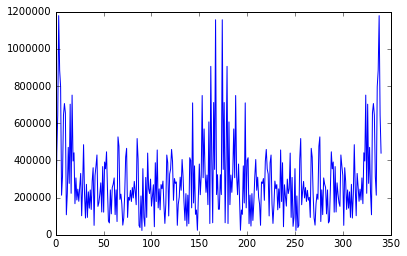

7664.0 == 7664.0
6685.0 == 6685.0
5914.0 == 5914.0
-17129.0 == -17129.0
4029.0 == 4029.0
783.0 == 783.0
2051.0 == 2051.0
6664.0 == 6664.0
26.0 == 26.0
12544.0 == 12544.0
-1999.0 == -1999.0
30456.0 == 30456.0
-3978.0 == -3978.0
5872.0 == 5872.0
-5866.0 == -5866.0
15337.0 == 15337.0
-7621.0 == -7621.0
2530.0 == 2530.0
-9207.0 == -9207.0
-25380.0 == -25380.0
-10596.0 == -10596.0
1750.0 == 1750.0
-11770.0 == -11770.0
21202.0 == 21202.0
-12718.0 == -12718.0
-32562.0 == -32562.0
-13440.0 == -13440.0
-31285.0 == -31285.0
-13947.0 == -13947.0
19657.0 == 19657.0
-14260.0 == -14260.0
-18232.0 == -18232.0
-14408.0 == -14408.0
-23353.0 == -23353.0
-14428.0 == -14428.0
-7737.0 == -7737.0
-14367.0 == -14367.0
16327.0 == 16327.0
-14273.0 == -14273.0
-30264.0 == -30264.0
-14199.0 == -14199.0
-30008.0 == -30008.0
-14198.0 == -14198.0
3272.0 == 3272.0
-14324.0 == -14324.0
-7736.0 == -7736.0
-14623.0 == -14623.0
-8762.0 == -8762.0
-15139.0 == -15139.0
-8764.0 == -8764.0
-15907.0 == -15907.0
-13631.0 == -

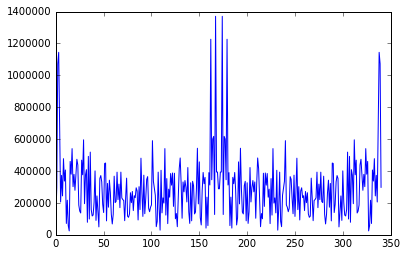

19238.0 == 19238.0
16203.0 == 16203.0
17727.0 == 17727.0
31813.0 == 31813.0
16508.0 == 16508.0
-10432.0 == -10432.0
15575.0 == 15575.0
15932.0 == 15932.0
14910.0 == 14910.0
-27846.0 == -27846.0
14483.0 == 14483.0
-20168.0 == -20168.0
14257.0 == 14257.0
27191.0 == 27191.0
14186.0 == 14186.0
-29129.0 == -29129.0
14222.0 == 14222.0
-6601.0 == -6601.0
14310.0 == 14310.0
15927.0 == 15927.0
14398.0 == 14398.0
24888.0 == 24888.0
14433.0 == 14433.0
7992.0 == 7992.0
14367.0 == 14367.0
20280.0 == 20280.0
14159.0 == 14159.0
-12745.0 == -12745.0
13774.0 == 13774.0
-32715.0 == -32715.0
13184.0 == 13184.0
22323.0 == 22323.0
12375.0 == 12375.0
18992.0 == 18992.0
11338.0 == 11338.0
24108.0 == 24108.0
10078.0 == 10078.0
-24281.0 == -24281.0
8609.0 == 8609.0
10529.0 == 10529.0
6953.0 == 6953.0
5659.0 == 5659.0
5142.0 == 5142.0
-29420.0 == -29420.0
3213.0 == 3213.0
-17908.0 == -17908.0
1210.0 == 1210.0
-13564.0 == -13564.0
-821.0 == -821.0
-4100.0 == -4100.0
-2833.0 == -2833.0
22004.0 == 22004.0
-4779.0 

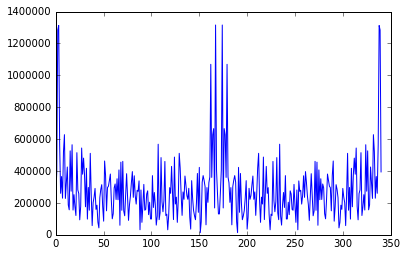

-28790.0 == -28790.0
-9841.0 == -9841.0
-25383.0 == -25383.0
-26724.0 == -26724.0
-22633.0 == -22633.0
-20569.0 == -20569.0
-20561.0 == -20561.0
6831.0 == 6831.0
-19174.0 == -19174.0
-6219.0 == -6219.0
-18457.0 == -18457.0
12983.0 == 12983.0
-18382.0 == -18382.0
10168.0 == 10168.0
-18905.0 == -18905.0
-586.0 == -586.0
-19971.0 == -19971.0
-1359.0 == -1359.0
-21510.0 == -21510.0
27051.0 == 27051.0
-23447.0 == -23447.0
-24924.0 == -24924.0
-25698.0 == -25698.0
-4709.0 == -4709.0
-28179.0 == -28179.0
-20847.0 == -20847.0
-30802.0 == -30802.0
13447.0 == 13447.0
32052.0 == 32052.0
-12419.0 == -12419.0
29391.0 == 29391.0
-14734.0 == -14734.0
26822.0 == 26822.0
23144.0 == 23144.0
24410.0 == 24410.0
-16545.0 == -16545.0
22207.0 == 22207.0
7254.0 == 7254.0
20252.0 == 20252.0
-29361.0 == -29361.0
18573.0 == 18573.0
8008.0 == 8008.0
17183.0 == 17183.0
-10941.0 == -10941.0
16085.0 == 16085.0
-24002.0 == -24002.0
15266.0 == 15266.0
28987.0 == 28987.0
14705.0 == 14705.0
7737.0 == 7737.0
14366.0 == 1

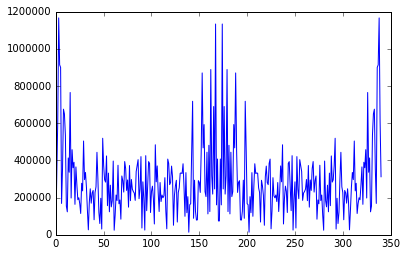

18340.0 == 18340.0
-23993.0 == -23993.0
18594.0 == 18594.0
11336.0 == 11336.0
19500.0 == 19500.0
23116.0 == 23116.0
21082.0 == 21082.0
13394.0 == 13394.0
23348.0 == 23348.0
-20133.0 == -20133.0
26289.0 == 26289.0
-18842.0 == -18842.0
29878.0 == 29878.0
6004.0 == 6004.0
-31465.0 == -31465.0
-26235.0 == -26235.0
-26727.0 == -26727.0
-3433.0 == -3433.0
-21518.0 == -21518.0
-13141.0 == -13141.0
-15924.0 == -15924.0
-14911.0 == -14911.0
-10043.0 == -10043.0
29912.0 == 29912.0
-3980.0 == -3980.0
27632.0 == 27632.0
2155.0 == 2155.0
15368.0 == 15368.0
8252.0 == 8252.0
30496.0 == 30496.0
14199.0 == 14199.0
-20425.0 == -20425.0
19888.0 == 19888.0
-31155.0 == -31155.0
25222.0 == 25222.0
-25502.0 == -25502.0
30108.0 == 30108.0
-22667.0 == -22667.0
-31065.0 == -31065.0
25990.0 == 25990.0
-27291.0 == -27291.0
-22891.0 == -22891.0
-24154.0 == -24154.0
19105.0 == 19105.0
-21686.0 == -21686.0
17579.0 == 17579.0
-19900.0 == -19900.0
-26958.0 == -26958.0
-18794.0 == -18794.0
21174.0 == 21174.0
-18350.0 =

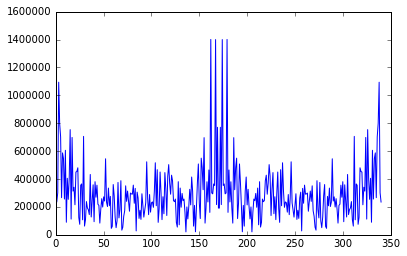

-14303.0 == -14303.0
2760.0 == 2760.0
-14582.0 == -14582.0
7879.0 == 7879.0
-15074.0 == -15074.0
15301.0 == 15301.0
-15813.0 == -15813.0
18114.0 == 18114.0
-16826.0 == -16826.0
12478.0 == 12478.0
-18128.0 == -18128.0
-2375.0 == -2375.0
-19722.0 == -19722.0
-23630.0 == -23630.0
-21597.0 == -21597.0
20139.0 == 20139.0
-23730.0 == -23730.0
7075.0 == 7075.0
-26085.0 == -26085.0
15258.0 == 15258.0
-28613.0 == -28613.0
-5488.0 == -5488.0
-31254.0 == -31254.0
28293.0 == 28293.0
31598.0 == 31598.0
5499.0 == 5499.0
28949.0 == 28949.0
12657.0 == 12657.0
26417.0 == 26417.0
6247.0 == 6247.0
24088.0 == 24088.0
8542.0 == 8542.0
22049.0 == 22049.0
-24746.0 == -24746.0
20383.0 == 20383.0
-7857.0 == -7857.0
19169.0 == 19169.0
11594.0 == 11594.0
18477.0 == 18477.0
-16056.0 == -16056.0
18369.0 == 18369.0
-13497.0 == -13497.0
18891.0 == 18891.0
27977.0 == 27977.0
20077.0 == 20077.0
-18354.0 == -18354.0
21944.0 == 21944.0
-20907.0 == -20907.0
24494.0 == 24494.0
15711.0 == 15711.0
27709.0 == 27709.0
17516.0

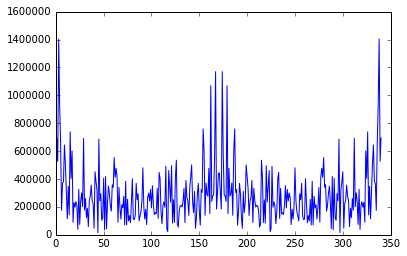

3421.0 == 3421.0
-28659.0 == -28659.0
1424.0 == 1424.0
-24059.0 == -24059.0
-606.0 == -606.0
-15619.0 == -15619.0
-2622.0 == -2622.0
7925.0 == 7925.0
-4578.0 == -4578.0
-6930.0 == -6930.0
-6428.0 == -6428.0
15078.0 == 15078.0
-8134.0 == -8134.0
17120.0 == 17120.0
-9662.0 == -9662.0
5850.0 == 5850.0
-10986.0 == -10986.0
-14635.0 == -14635.0
-12090.0 == -12090.0
22992.0 == 22992.0
-12967.0 == -12967.0
-13107.0 == -13107.0
-13620.0 == -13620.0
4298.0 == 4298.0
-14064.0 == -14064.0
3785.0 == 3785.0
-14322.0 == -14322.0
-22840.0 == -22840.0
-14426.0 == -14426.0
-20281.0 == -20281.0
-14416.0 == -14416.0
-569.0 == -569.0
-14339.0 == -14339.0
23495.0 == 23495.0
-14245.0 == -14245.0
-27448.0 == -27448.0
-14188.0 == -14188.0
29384.0 == 29384.0
-14222.0 == -14222.0
-15160.0 == -15160.0
-14396.0 == -14396.0
22983.0 == 22983.0
-14759.0 == -14759.0
2758.0 == 2758.0
-15350.0 == -15350.0
-18492.0 == -18492.0
-16201.0 == -16201.0
19136.0 == 19136.0
-17334.0 == -17334.0
-17732.0 == -17732.0
-18758.0 == 

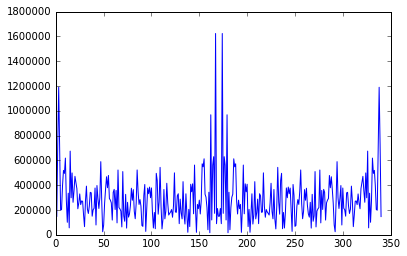

16188.0 == 16188.0
-5057.0 == -5057.0
15340.0 == 15340.0
-24261.0 == -24261.0
14753.0 == 14753.0
14649.0 == 14649.0
14393.0 == 14393.0
-29640.0 == -29640.0
14220.0 == 14220.0
27959.0 == 27959.0
14189.0 == 14189.0
-22985.0 == -22985.0
14246.0 == 14246.0
1079.0 == 1079.0
14340.0 == 14340.0
20536.0 == 20536.0
14416.0 == 14416.0
22840.0 == 22840.0
14425.0 == 14425.0
-4296.0 == -4296.0
14319.0 == 14319.0
-5065.0 == -5065.0
14060.0 == 14060.0
11574.0 == 11574.0
13613.0 == 13613.0
-25547.0 == -25547.0
12956.0 == 12956.0
11314.0 == 11314.0
12076.0 == 12076.0
-9937.0 == -9937.0
10969.0 == 10969.0
-21974.0 == -21974.0
9642.0 == 9642.0
-20443.0 == -20443.0
8112.0 == 8112.0
1055.0 == 1055.0
6404.0 == 6404.0
-14311.0 == -14311.0
4552.0 == 4552.0
8977.0 == 8977.0
2595.0 == 2595.0
16906.0 == 16906.0
578.0 == 578.0
21762.0 == 21762.0
-1451.0 == -1451.0
-30470.0 == -30470.0
-3448.0 == -3448.0
3058.0 == 3058.0
-5365.0 == -5365.0
2539.0 == 2539.0
-7159.0 == -7159.0
-22812.0 == -22812.0
-8794.0 == -8794.0

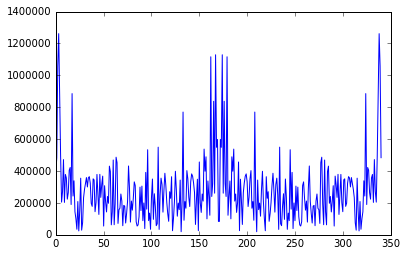

-21914.0 == -21914.0
-22358.0 == -22358.0
-20056.0 == -20056.0
16817.0 == 16817.0
-18879.0 == -18879.0
17078.0 == 17078.0
-18366.0 == -18366.0
-12872.0 == -12872.0
-18483.0 == -18483.0
4791.0 == 4791.0
-19182.0 == -19182.0
19893.0 == 19893.0
-20403.0 == -20403.0
-14672.0 == -14672.0
-22074.0 == -22074.0
-13655.0 == -13655.0
-24118.0 == -24118.0
-20831.0 == -20831.0
-26450.0 == -26450.0
-14440.0 == -14440.0
-28985.0 == -28985.0
28046.0 == 28046.0
-31635.0 == -31635.0
-3708.0 == -3708.0
31217.0 == 31217.0
-23943.0 == -23943.0
28578.0 == 28578.0
-15249.0 == -15249.0
26052.0 == 26052.0
-27547.0 == -27547.0
23700.0 == 23700.0
16988.0 == 16988.0
21570.0 == 21570.0
-3500.0 == -3500.0
19698.0 == 19698.0
-17076.0 == -17076.0
18109.0 == 18109.0
-21946.0 == -21946.0
16810.0 == 16810.0
-18111.0 == -18111.0
15801.0 == 15801.0
-9923.0 == -9923.0
15065.0 == 15065.0
-3782.0 == -3782.0
14577.0 == 14577.0
-8904.0 == -8904.0
14301.0 == 14301.0
28983.0 == 28983.0
14193.0 == 14193.0
32055.0 == 32055.0
1420

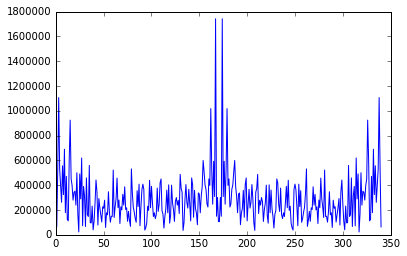

19920.0 == 19920.0
-11443.0 == -11443.0
21715.0 == 21715.0
-32428.0 == -32428.0
24193.0 == 24193.0
-13474.0 == -13474.0
27339.0 == 27339.0
-28310.0 == -28310.0
31121.0 == 31121.0
-23687.0 == -23687.0
-30045.0 == -30045.0
-16246.0 == -16246.0
-25152.0 == -25152.0
-25699.0 == -25699.0
-19813.0 == -19813.0
-9806.0 == -9806.0
-14119.0 == -14119.0
5832.0 == 5832.0
-8170.0 == -8170.0
-5920.0 == -5920.0
-2072.0 == -2072.0
-8201.0 == -8201.0
4063.0 == 4063.0
-29425.0 == -29425.0
10125.0 == 10125.0
-31961.0 == -31961.0
16003.0 == 16003.0
22590.0 == 22590.0
21592.0 == 21592.0
-21676.0 == -21676.0
26795.0 == 26795.0
9832.0 == 9832.0
31526.0 == 31526.0
32635.0 == 32635.0
-29825.0 == -29825.0
31627.0 == 31627.0
-26245.0 == -26245.0
-4199.0 == -4199.0
-23313.0 == -23313.0
-16220.0 == -16220.0
-21056.0 == -21056.0
-6739.0 == -6739.0
-19483.0 == -19483.0
26291.0 == 26291.0
-18586.0 == -18586.0
23479.0 == 23479.0
-18341.0 == -18341.0
-4680.0 == -4680.0
-18707.0 == -18707.0
20662.0 == 20662.0
-19632.0 =

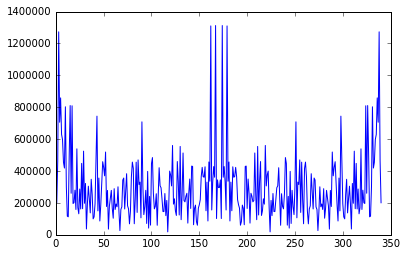

-15276.0 == -15276.0
7876.0 == 7876.0
-16098.0 == -16098.0
-12095.0 == -12095.0
-17200.0 == -17200.0
24252.0 == 24252.0
-18594.0 == -18594.0
-13385.0 == -13385.0
-20277.0 == -20277.0
9648.0 == 9648.0
-22235.0 == -22235.0
-31063.0 == -31063.0
-24442.0 == -24442.0
6048.0 == 6048.0
-26857.0 == -26857.0
3735.0 == 3735.0
-29426.0 == -29426.0
-22387.0 == -22387.0
-32088.0 == -32088.0
11906.0 == 11906.0
30766.0 == 30766.0
-3976.0 == -3976.0
28144.0 == 28144.0
17005.0 == 17005.0
25666.0 == 25666.0
31332.0 == 31332.0
23418.0 == 23418.0
-4517.0 == -4517.0
21486.0 == 21486.0
-3757.0 == -3757.0
19953.0 == 19953.0
-12723.0 == -12723.0
18894.0 == 18894.0
-13495.0 == -13495.0
18379.0 == 18379.0
7751.0 == 7751.0
18462.0 == 18462.0
-3000.0 == -3000.0
19188.0 == 19188.0
26954.0 == 26954.0
20585.0 == 20585.0
-30128.0 == -30128.0
22666.0 == 22666.0
20824.0 == 20824.0
25425.0 == 25425.0
-22173.0 == -22173.0
28841.0 == 28841.0
27504.0 == 27504.0
-32661.0 == -32661.0
24704.0 == 24704.0
-28064.0 == -28064.0
1

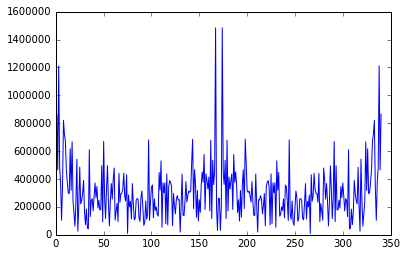

-1238.0 == -1238.0
22779.0 == 22779.0
-3240.0 == -3240.0
-11789.0 == -11789.0
-5167.0 == -5167.0
-16405.0 == -16405.0
-6977.0 == -6977.0
19172.0 == 19172.0
-8630.0 == -8630.0
-28706.0 == -28706.0
-10097.0 == -10097.0
-22824.0 == -22824.0
-11354.0 == -11354.0
-25133.0 == -25133.0
-12387.0 == -12387.0
30415.0 == 30415.0
-13194.0 == -13194.0
11468.0 == 11468.0
-13780.0 == -13780.0
-21046.0 == -21046.0
-14163.0 == -14163.0
-8248.0 == -8248.0
-14369.0 == -14369.0
-24633.0 == -24633.0
-14433.0 == -14433.0
-15417.0 == -15417.0
-14397.0 == -14397.0
7111.0 == 7111.0
-14309.0 == -14309.0
29640.0 == 29640.0
-14221.0 == -14221.0
-27192.0 == -27192.0
-14187.0 == -14187.0
19912.0 == 19912.0
-14259.0 == -14259.0
27080.0 == 27080.0
-14487.0 == -14487.0
-17465.0 == -17465.0
-14917.0 == -14917.0
7877.0 == 7877.0
-15586.0 == -15586.0
30147.0 == 30147.0
-16523.0 == -16523.0
-20801.0 == -20801.0
-17746.0 == -17746.0
-15430.0 == -15430.0
-19261.0 == -19261.0
-17484.0 == -17484.0
-21061.0 == -21061.0
-22099.

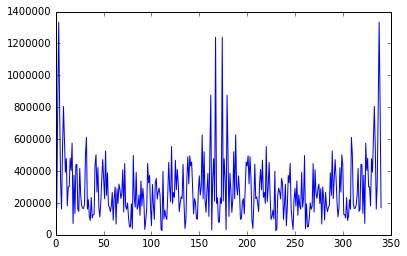

14618.0 == 14618.0
-3783.0 == -3783.0
14321.0 == 14321.0
30263.0 == 30263.0
14198.0 == 14198.0
30519.0 == 30519.0
14199.0 == 14199.0
-15817.0 == -15817.0
14274.0 == 14274.0
8247.0 == 8247.0
14368.0 == 14368.0
23864.0 == 23864.0
14429.0 == 14429.0
17976.0 == 17976.0
14406.0 == 14406.0
-20168.0 == -20168.0
14257.0 == 14257.0
30263.0 == 30263.0
13942.0 == 13942.0
30774.0 == 30774.0
13432.0 == 13432.0
-23756.0 == -23756.0
12707.0 == 12707.0
-5071.0 == -5071.0
11756.0 == 11756.0
21293.0 == 21293.0
10579.0 == 10579.0
-7639.0 == -7639.0
9186.0 == 9186.0
-20957.0 == -20957.0
7598.0 == 7598.0
-12003.0 == -12003.0
5841.0 == 5841.0
28694.0 == 28694.0
3952.0 == 3952.0
-19441.0 == -19441.0
1972.0 == 1972.0
-13817.0 == -13817.0
-53.9999999999 == -54.0
-7681.0 == -7681.0
-2079.0 == -2079.0
10743.0 == 10743.0
-4055.0 == -4055.0
-12816.0 == -12816.0
-5939.0 == -5939.0
-1560.0 == -1560.0
-7687.0 == -7687.0
-12575.0 == -12575.0
-9266.0 == -9266.0
27099.0 == 27099.0
-10647.0 == -10647.0
-9002.0 == -9002.0

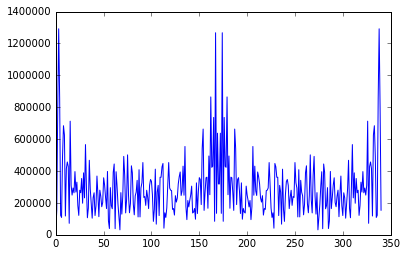

-18650.0 == -18650.0
24503.0 == 24503.0
-18337.0 == -18337.0
12216.0 == 12216.0
-18641.0 == -18641.0
-13385.0 == -13385.0
-19509.0 == -19509.0
29363.0 == 29363.0
-20878.0 == -20878.0
28078.0 == 28078.0
-22675.0 == -22675.0
4007.0 == 4007.0
-24817.0 == -24817.0
-21857.0 == -21857.0
-27222.0 == -27222.0
-26731.0 == -26731.0
-29801.0 == -29801.0
10635.0 == 10635.0
-32471.0 == -32471.0
-19583.0 == -19583.0
30387.0 == 30387.0
-32650.0 == -32650.0
27776.0 == 27776.0
-11668.0 == -11668.0
25298.0 == 25298.0
-7326.0 == -7326.0
23011.0 == 23011.0
-8615.0 == -8615.0
20958.0 == 20958.0
-7087.0 == -7087.0
19172.0 == 19172.0
2378.0 == 2378.0
17673.0 == 17673.0
21061.0 == 21061.0
16466.0 == 16466.0
-18368.0 == -18368.0
15544.0 == 15544.0
10300.0 == 10300.0
14888.0 == 14888.0
-31174.0 == -31174.0
14470.0 == 14470.0
-21704.0 == -21704.0
14251.0 == 14251.0
27191.0 == 27191.0
14186.0 == 14186.0
-28361.0 == -28361.0
14225.0 == 14225.0
-5577.0 == -5577.0
14314.0 == 14314.0
16439.0 == 16439.0
14400.0 == 144

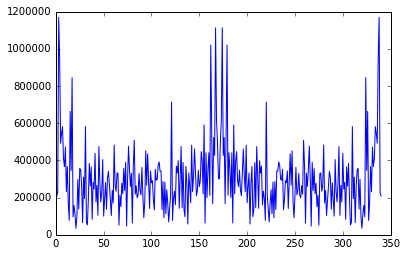

25102.0 == 25102.0
8802.0 == 8802.0
28450.0 == 28450.0
-23185.0 == -23185.0
32421.0 == 32421.0
25214.0 == 25214.0
-28574.0 == -28574.0
5008.0 == 5008.0
-23533.0 == -23533.0
26276.0 == 26276.0
-18074.0 == -18074.0
-71.0 == -71.0
-12289.0 == -12289.0
30415.0 == 30415.0
-6282.0 == -6282.0
24807.0 == 24807.0
-160.0 == -160.0
19711.0 == 19711.0
5964.0 == 5964.0
-13289.0 == -13289.0
11980.0 == 11980.0
29486.0 == 29486.0
17779.0 == 17779.0
-9915.0 == -9915.0
23257.0 == 23257.0
-23718.0 == -23718.0
28323.0 == 28323.0
31598.0 == 31598.0
-32645.0 == -32645.0
7552.0 == 7552.0
-28643.0 == -28643.0
21392.0 == 21392.0
-25261.0 == -25261.0
-2147.0 == -2147.0
-22537.0 == -22537.0
-3161.0 == -3161.0
-20493.0 == -20493.0
17583.0 == 17583.0
-19132.0 == -19132.0
-2379.0 == -2379.0
-18442.0 == -18442.0
10423.0 == 10423.0
-18392.0 == -18392.0
1720.0 == 1720.0
-18938.0 == -18938.0
-13898.0 == -13898.0
-20023.0 == -20023.0
-19279.0 == -19279.0
-21580.0 == -21580.0
5547.0 == 5547.0
-23531.0 == -23531.0
16292.0

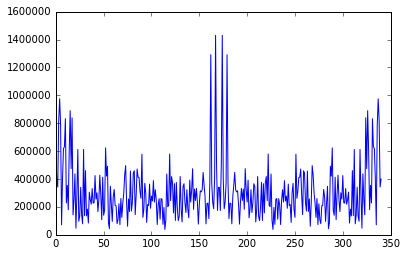

-17603.0 == -17603.0
29115.0 == 29115.0
-19087.0 == -19087.0
-31051.0 == -31051.0
-20858.0 == -20858.0
-28754.0 == -28754.0
-22897.0 == -22897.0
-21850.0 == -21850.0
-25174.0 == -25174.0
1437.0 == 1437.0
-27643.0 == -27643.0
-10348.0 == -10348.0
-30249.0 == -30249.0
25481.0 == 25481.0
32611.0 == 32611.0
-3201.0 == -3201.0
29939.0 == 29939.0
-9868.0 == -9868.0
27353.0 == 27353.0
26986.0 == 26986.0
24937.0 == 24937.0
-1183.0 == -1183.0
22779.0 == 22779.0
-7592.0 == -7592.0
20962.0 == 20962.0
29009.0 == 29009.0
19569.0 == 19569.0
-3764.0 == -3764.0
18673.0 == 18673.0
-23992.0 == -23992.0
18338.0 == 18338.0
-18105.0 == -18105.0
18617.0 == 18617.0
24136.0 == 24136.0
19550.0 == 19550.0
-22708.0 == -22708.0
21159.0 == 21159.0
-25262.0 == -25262.0
23453.0 == 23453.0
13403.0 == 13403.0
26420.0 == 26420.0
20839.0 == 20839.0
30033.0 == 30033.0
-13963.0 == -13963.0
-31287.0 == -31287.0
24709.0 == 24709.0
-26528.0 == -26528.0
-13672.0 == -13672.0
-21302.0 == -21302.0
-20052.0 == -20052.0
-15695.0 =

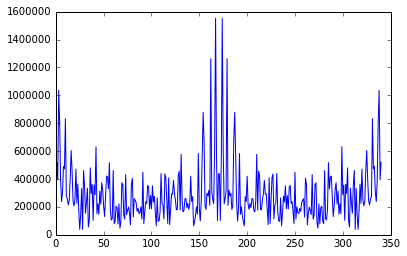

-5745.0 == -5745.0
-21783.0 == -21783.0
-7510.0 == -7510.0
27874.0 == 27874.0
-9108.0 == -9108.0
-3620.0 == -3620.0
-10511.0 == -10511.0
19670.0 == 19670.0
-11700.0 == -11700.0
-29998.0 == -29998.0
-12662.0 == -12662.0
-22066.0 == -22066.0
-13399.0 == -13399.0
-24373.0 == -24373.0
-13920.0 == -13920.0
23497.0 == 23497.0
-14245.0 == -14245.0
-16696.0 == -16696.0
-14402.0 == -14402.0
-23865.0 == -23865.0
-14430.0 == -14430.0
-9017.0 == -9017.0
-14372.0 == -14372.0
14791.0 == 14791.0
-14279.0 == -14279.0
-31032.0 == -31032.0
-14202.0 == -14202.0
-29240.0 == -29240.0
-14195.0 == -14195.0
6600.0 == 6600.0
-14311.0 == -14311.0
-1080.0 == -1080.0
-14597.0 == -14597.0
1734.0 == 1734.0
-15098.0 == -15098.0
6341.0 == 6341.0
-15848.0 == -15848.0
6338.0 == 6338.0
-16872.0 == -16872.0
-2370.0 == -2370.0
-18186.0 == -18186.0
-20040.0 == -20040.0
-19791.0 == -19791.0
21426.0 == 21426.0
-21677.0 == -21677.0
-2901.0 == -2901.0
-23820.0 == -23820.0
-18014.0 == -18014.0
-26183.0 == -26183.0
-11111.0 == -

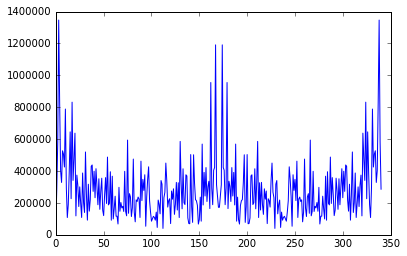

14187.0 == 14187.0
-30409.0 == -30409.0
14217.0 == 14217.0
-8137.0 == -8137.0
14304.0 == 14304.0
14647.0 == 14647.0
14393.0 == 14393.0
24888.0 == 24888.0
14433.0 == 14433.0
10040.0 == 10040.0
14375.0 == 14375.0
25144.0 == 25144.0
14178.0 == 14178.0
-4809.0 == -4809.0
13805.0 == 13805.0
-20939.0 == -20939.0
13230.0 == 13230.0
-27853.0 == -27853.0
12435.0 == 12435.0
-27344.0 == -27344.0
11413.0 == 11413.0
-18388.0 == -18388.0
10168.0 == 10168.0
2087.0 == 2087.0
8712.0 == 8712.0
-25822.0 == -25822.0
7067.0 == 7067.0
-28389.0 == -28389.0
5265.0 == 5265.0
3860.0 == 3860.0
3343.0 == 3343.0
16141.0 == 16141.0
1343.0 == 1343.0
20741.0 == 20741.0
-687.0 == -687.0
29437.0 == 29437.0
-2702.0 == -2702.0
-11531.0 == -11531.0
-4654.0 == -4654.0
-25107.0 == -25107.0
-6499.0 == -6499.0
-1306.0 == -1306.0
-8198.0 == -8198.0
2783.0 == 2783.0
-9718.0 == -9718.0
-6438.0 == -6438.0
-11034.0 == -11034.0
-24620.0 == -24620.0
-12129.0 == -12129.0
15312.0 == 15312.0
-12997.0 == -12997.0
-18739.0 == -18739.0
-1

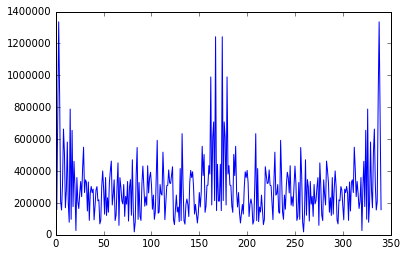

-18854.0 == -18854.0
21430.0 == 21430.0
-19885.0 == -19885.0
27826.0 == 27826.0
-21396.0 == -21396.0
-3156.0 == -3156.0
-23309.0 == -23309.0
15012.0 == 15012.0
-25542.0 == -25542.0
-26980.0 == -26980.0
-28010.0 == -28010.0
23954.0 == 23954.0
-30627.0 == -30627.0
-6776.0 == -6776.0
32229.0 == 32229.0
31869.0 == 31869.0
29564.0 == 29564.0
27763.0 == 27763.0
26988.0 == 26988.0
-3223.0 == -3223.0
24563.0 == 24563.0
18783.0 == 18783.0
22345.0 == 22345.0
-27561.0 == -27561.0
20372.0 == 20372.0
-3505.0 == -3505.0
18674.0 == 18674.0
29256.0 == 29256.0
17266.0 == 17266.0
5443.0 == 5443.0
16149.0 == 16149.0
-12225.0 == -12225.0
15312.0 == 15312.0
-29125.0 == -29125.0
14734.0 == 14734.0
12089.0 == 12089.0
14383.0 == 14383.0
-30408.0 == -30408.0
14217.0 == 14217.0
28215.0 == 28215.0
14190.0 == 14190.0
-21961.0 == -21961.0
14250.0 == 14250.0
2103.0 == 2103.0
14344.0 == 14344.0
21048.0 == 21048.0
14418.0 == 14418.0
22328.0 == 22328.0
14423.0 == 14423.0
-6088.0 == -6088.0
14312.0 == 14312.0
-8649.0 =

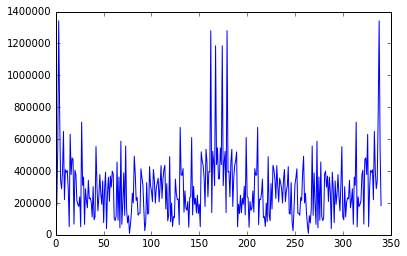

-31759.0 == -31759.0
20867.0 == 20867.0
-27055.0 == -27055.0
-29034.0 == -29034.0
-21874.0 == -21874.0
20906.0 == 20906.0
-16303.0 == -16303.0
15040.0 == 15040.0
-10438.0 == -10438.0
-7721.0 == -7721.0
-4383.0 == -4383.0
-10258.0 == -10258.0
1751.0 == 1751.0
-20986.0 == -20986.0
7854.0 == 7854.0
-2530.0 == -2530.0
13814.0 == 13814.0
17205.0 == 17205.0
19523.0 == 19523.0
13132.0 == 13132.0
24883.0 == 24883.0
27233.0 == 27233.0
29802.0 == 29802.0
-26252.0 == -26252.0
-31335.0 == -31335.0
32645.0 == 32645.0
-27521.0 == -27521.0
-5228.0 == -5228.0
-24341.0 == -24341.0
-16992.0 == -16992.0
-21827.0 == -21827.0
-7254.0 == -7254.0
-19997.0 == -19997.0
25009.0 == 25009.0
-18847.0 == -18847.0
18870.0 == 18870.0
-18359.0 == -18359.0
-17224.0 == -17224.0
-18500.0 == -18500.0
-5193.0 == -5193.0
-19221.0 == -19221.0
5044.0 == 5044.0
-20461.0 == -20461.0
31664.0 == 31664.0
-22149.0 == -22149.0
29353.0 == 29353.0
-24206.0 == -24206.0
19617.0 == 19617.0
-26548.0 == -26548.0
24728.0 == 24728.0
-29088.0

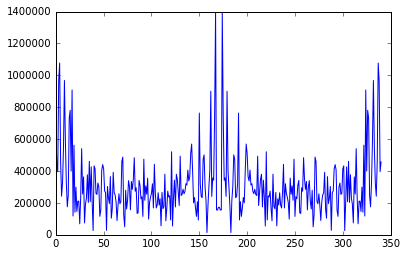

-21465.0 == -21465.0
-7764.0 == -7764.0
-23583.0 == -23583.0
-17245.0 == -17245.0
-25924.0 == -25924.0
-6502.0 == -6502.0
-28442.0 == -28442.0
-25968.0 == -25968.0
-31078.0 == -31078.0
8070.0 == 8070.0
31775.0 == 31775.0
-16004.0 == -16004.0
29121.0 == 29121.0
-11663.0 == -11663.0
26578.0 == 26578.0
-21913.0 == -21913.0
24234.0 == 24234.0
-25250.0 == -25250.0
22173.0 == 22173.0
86.0 == 86.0
20480.0 == 20480.0
8784.0 == 8784.0
19234.0 == 19234.0
19019.0 == 19019.0
18506.0 == 18506.0
-19128.0 == -19128.0
18357.0 == 18357.0
-27577.0 == -27577.0
18836.0 == 18836.0
2633.0 == 2633.0
19978.0 == 19978.0
10318.0 == 10318.0
21800.0 == 21800.0
-3755.0 == -3755.0
24305.0 == 24305.0
21854.0 == 21854.0
27477.0 == 27477.0
13419.0 == 13419.0
31284.0 == 31284.0
23674.0 == 23674.0
-29860.0 == -29860.0
-29301.0 == -29301.0
-24947.0 == -24947.0
30622.0 == 30622.0
-19593.0 == -19593.0
-15949.0 == -15949.0
-13887.0 == -13887.0
1993.0 == 1993.0
-7929.0 == -7929.0
-8991.0 == -8991.0
-1828.0 == -1828.0
-11528.

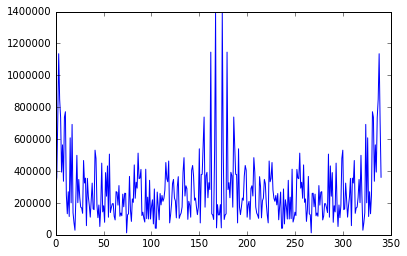

-9567.0 == -9567.0
26586.0 == 26586.0
-10905.0 == -10905.0
2261.0 == 2261.0
-12024.0 == -12024.0
-29487.0 == -29487.0
-12916.0 == -12916.0
-3891.0 == -3891.0
-13584.0 == -13584.0
10186.0 == 10186.0
-14041.0 == -14041.0
6857.0 == 6857.0
-14310.0 == -14310.0
-22072.0 == -22072.0
-14423.0 == -14423.0
-21049.0 == -21049.0
-14419.0 == -14419.0
-2105.0 == -2105.0
-14345.0 == -14345.0
21959.0 == 21959.0
-14251.0 == -14251.0
-27960.0 == -27960.0
-14190.0 == -14190.0
30920.0 == 30920.0
-14216.0 == -14216.0
-11064.0 == -11064.0
-14380.0 == -14380.0
30663.0 == 30663.0
-14729.0 == -14729.0
14790.0 == 14790.0
-15303.0 == -15303.0
-1852.0 == -1852.0
-16136.0 == -16136.0
-24896.0 == -24896.0
-17250.0 == -17250.0
8636.0 == 8636.0
-18655.0 == -18655.0
-31817.0 == -31817.0
-20349.0 == -20349.0
-11856.0 == -11856.0
-22319.0 == -22319.0
10920.0 == 10920.0
-24534.0 == -24534.0
-19296.0 == -19296.0
-26956.0 == -26956.0
-23146.0 == -23146.0
-29531.0 == -29531.0
15756.0 == 15756.0
-32195.0 == -32195.0
-15230.

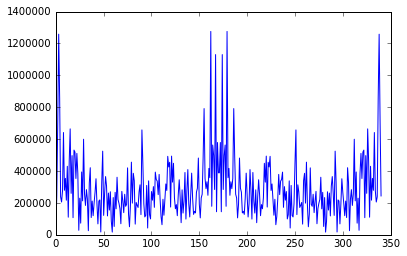

14334.0 == 14334.0
19767.0 == 19767.0
14413.0 == 14413.0
23608.0 == 23608.0
14428.0 == 14428.0
-1224.0 == -1224.0
14331.0 == 14331.0
567.0 == 567.0
14082.0 == 14082.0
20791.0 == 20791.0
13649.0 == 13649.0
-12747.0 == -12747.0
13006.0 == 13006.0
27954.0 == 27954.0
12141.0 == 12141.0
10543.0 == 10543.0
11049.0 == 11049.0
2091.0 == 2091.0
9736.0 == 9736.0
6950.0 == 6950.0
8219.0 == 8219.0
31008.0 == 31008.0
6521.0 == 6521.0
17945.0 == 17945.0
4678.0 == 4678.0
-22766.0 == -22766.0
2727.0 == 2727.0
-14326.0 == -14326.0
712.0 == 712.0
-9726.0 == -9726.0
-1318.0 == -1318.0
2810.0 == 2810.0
-3318.0 == -3318.0
-30989.0 == -30989.0
-5242.0 == -5242.0
31467.0 == 31467.0
-7046.0 == -7046.0
3300.0 == 3300.0
-8692.0 == -8692.0
23006.0 == 23006.0
-10151.0 == -10151.0
31192.0 == 31192.0
-11399.0 == -11399.0
30931.0 == 30931.0
-12424.0 == -12424.0
23503.0 == 23503.0
-13221.0 == -13221.0
6604.0 == 6604.0
-13799.0 == -13799.0
-23862.0 == -23862.0
-14174.0 == -14174.0
-9528.0 == -9528.0
-14374.0 == -14374

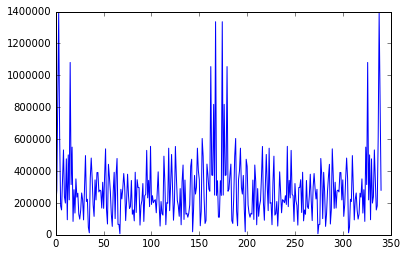

-21952.0 == -21952.0
23210.0 == 23210.0
-23974.0 == -23974.0
20386.0 == 20386.0
-26289.0 == -26289.0
29593.0 == 29593.0
-28813.0 == -28813.0
7823.0 == 7823.0
-31458.0 == -31458.0
-23931.0 == -23931.0
31394.0 == 31394.0
19834.0 == 19834.0
28749.0 == 28749.0
26224.0 == 26224.0
26214.0 == 26214.0
10342.0 == 10342.0
23848.0 == 23848.0
-14499.0 == -14499.0
21703.0 == 21703.0
25940.0 == 25940.0
19813.0 == 19813.0
7245.0 == 7245.0
18204.0 == 18204.0
-2233.0 == -2233.0
16887.0 == 16887.0
-3263.0 == -3263.0
15859.0 == 15859.0
573.0 == 573.0
15106.0 == 15106.0
2619.0 == 2619.0
14602.0 == 14602.0
-5831.0 == -5831.0
14313.0 == 14313.0
29751.0 == 29751.0
14196.0 == 14196.0
31031.0 == 31031.0
14201.0 == 14201.0
-14793.0 == -14793.0
14278.0 == 14278.0
9015.0 == 9015.0
14371.0 == 14371.0
24120.0 == 24120.0
14430.0 == 14430.0
17208.0 == 17208.0
14403.0 == 14403.0
-22472.0 == -22472.0
14248.0 == 14248.0
25911.0 == 25911.0
13925.0 == 13925.0
24374.0 == 24374.0
13407.0 == 13407.0
-32460.0 == -32460.0
1267

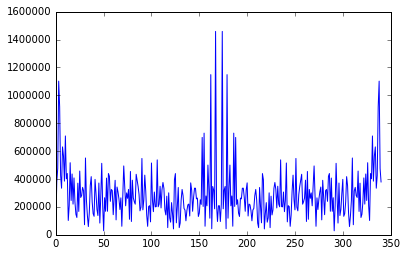

-20177.0 == -20177.0
22961.0 == 22961.0
-14503.0 == -14503.0
-30521.0 == -30521.0
-8568.0 == -8568.0
21726.0 == 21726.0
-2476.0 == -2476.0
19702.0 == 19702.0
3660.0 == 3660.0
526.0 == 526.0
9730.0 == 9730.0
1830.0 == 1830.0
15623.0 == 15623.0
-3523.0 == -3523.0
21234.0 == 21234.0
25170.0 == 25170.0
26466.0 == 26466.0
-153.0 == -153.0
31231.0 == 31231.0
32377.0 == 32377.0
-30082.0 == -30082.0
-23670.0 == -23670.0
-26461.0 == -26461.0
17048.0 == 17048.0
-23486.0 == -23486.0
16548.0 == 16548.0
-21184.0 == -21184.0
-27987.0 == -27987.0
-19566.0 == -19566.0
16307.0 == 16307.0
-18625.0 == -18625.0
24247.0 == 24247.0
-18338.0 == -18338.0
6072.0 == 6072.0
-18665.0 == -18665.0
-25161.0 == -25161.0
-19555.0 == -19555.0
12979.0 == 12979.0
-20942.0 == -20942.0
7854.0 == 7854.0
-22754.0 == -22754.0
-19545.0 == -19545.0
-24909.0 == -24909.0
18078.0 == 18078.0
-27322.0 == -27322.0
11925.0 == 11925.0
-29906.0 == -29906.0
-16757.0 == -16757.0
-32578.0 == -32578.0
19072.0 == 19072.0
30282.0 == 30282.0
7

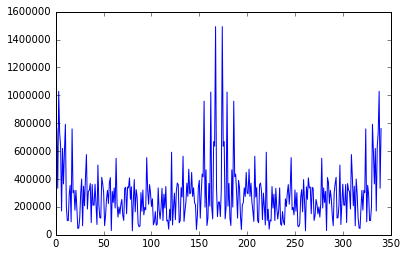

-26692.0 == -26692.0
-17513.0 == -17513.0
-29253.0 == -29253.0
22925.0 == 22925.0
-31911.0 == -31911.0
-8573.0 == -8573.0
30942.0 == 30942.0
-26248.0 == -26248.0
28313.0 == 28313.0
-8338.0 == -8338.0
25823.0 == 25823.0
1380.0 == 1380.0
23557.0 == 23557.0
25180.0 == 25180.0
21602.0 == 21602.0
18516.0 == 18516.0
20040.0 == 20040.0
1102.0 == 1102.0
18948.0 == 18948.0
-9398.0 == -9398.0
18395.0 == 18395.0
1351.0 == 1351.0
18437.0 == 18437.0
-20408.0 == -20408.0
19120.0 == 19120.0
-1974.0 == -1974.0
20472.0 == 20472.0
-5297.0 == -5297.0
22507.0 == 22507.0
-31145.0 == -31145.0
25222.0 == 25222.0
-19358.0 == -19358.0
28596.0 == 28596.0
20335.0 == 20335.0
32591.0 == 32591.0
8575.0 == 8575.0
-28383.0 == -28383.0
-7023.0 == -7023.0
-23324.0 == -23324.0
18340.0 == 18340.0
-17849.0 == -17849.0
-5446.0 == -5446.0
-12054.0 == -12054.0
26832.0 == 26832.0
-6040.0 == -6040.0
21480.0 == 21480.0
83.0 == 83.0
15872.0 == 15872.0
6206.0 == 6206.0
-18664.0 == -18664.0
12215.0 == 12215.0
21295.0 == 21295.0
18

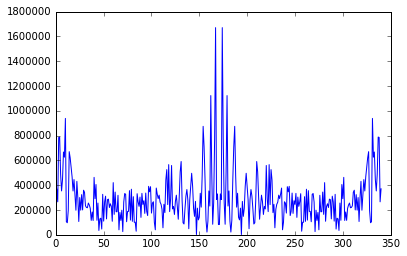

-12326.0 == -12326.0
-23345.0 == -23345.0
-13148.0 == -13148.0
19660.0 == 19660.0
-13748.0 == -13748.0
-16182.0 == -16182.0
-14144.0 == -14144.0
-5944.0 == -5944.0
-14360.0 == -14360.0
-24377.0 == -24377.0
-14432.0 == -14432.0
-16441.0 == -16441.0
-14401.0 == -14401.0
5575.0 == 5575.0
-14315.0 == -14315.0
28360.0 == 28360.0
-14226.0 == -14226.0
-26936.0 == -26936.0
-14186.0 == -14186.0
22216.0 == 22216.0
-14250.0 == -14250.0
32456.0 == 32456.0
-14466.0 == -14466.0
-8505.0 == -8505.0
-14882.0 == -14882.0
21189.0 == 21189.0
-15534.0 == -15534.0
-17213.0 == -17213.0
-16452.0 == -16452.0
2239.0 == 2239.0
-17656.0 == -17656.0
12475.0 == 12475.0
-19152.0 == -19152.0
15029.0 == 15029.0
-20934.0 == -20934.0
14510.0 == 14510.0
-22984.0 == -22984.0
19366.0 == 19366.0
-25269.0 == -25269.0
-24419.0 == -24419.0
-27744.0 == -27744.0
28307.0 == 28307.0
-30354.0 == -30354.0
-1911.0 == -1911.0
32504.0 == 32504.0
-30082.0 == -30082.0
29834.0 == 29834.0
30068.0 == 30068.0
27253.0 == 27253.0
3690.0 == 369

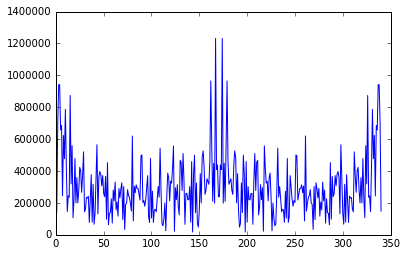

14411.0 == 14411.0
-16584.0 == -16584.0
14271.0 == 14271.0
-28617.0 == -28617.0
13968.0 == 13968.0
-24522.0 == -24522.0
13472.0 == 13472.0
-9932.0 == -9932.0
12761.0 == 12761.0
12593.0 == 12593.0
11825.0 == 11825.0
-22738.0 == -22738.0
10663.0 == 10663.0
17449.0 == 17449.0
9284.0 == 9284.0
7204.0 == 7204.0
7708.0 == 7708.0
18718.0 == 18718.0
5961.0 == 5961.0
-4073.0 == -4073.0
4080.0 == 4080.0
14351.0 == 14351.0
2104.0 == 2104.0
20232.0 == 20232.0
78.9999999999 == 79.0
26112.0 == 26112.0
-1946.0 == -1946.0
-22280.0 == -22280.0
-3928.0 == -3928.0
18160.0 == 18160.0
-5818.0 == -5818.0
26601.0 == 26601.0
-7577.0 == -7577.0
12514.0 == 12514.0
-9168.0 == -9168.0
-16932.0 == -16932.0
-10563.0 == -10563.0
8918.0 == 8918.0
-11742.0 == -11742.0
26834.0 == 26834.0
-12696.0 == -12696.0
-28466.0 == -28466.0
-13424.0 == -13424.0
-28725.0 == -28725.0
-13937.0 == -13937.0
21193.0 == 21193.0
-14254.0 == -14254.0
-17464.0 == -17464.0
-14405.0 == -14405.0
-23609.0 == -23609.0
-14429.0 == -14429.0
-8249.

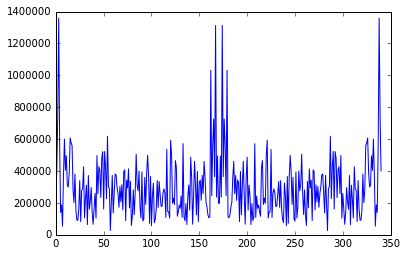

-27057.0 == -27057.0
17558.0 == 17558.0
-29628.0 == -29628.0
-9588.0 == -9588.0
-32294.0 == -32294.0
25473.0 == 25473.0
30563.0 == 30563.0
10615.0 == 10615.0
27945.0 == 27945.0
28781.0 == 28781.0
25456.0 == 25456.0
29539.0 == 29539.0
23155.0 == 23155.0
23898.0 == 23898.0
21085.0 == 21085.0
20818.0 == 20818.0
19281.0 == 19281.0
25419.0 == 25419.0
17763.0 == 17763.0
-26555.0 == -26555.0
16536.0 == 16536.0
-5056.0 == -5056.0
15596.0 == 15596.0
19516.0 == 19516.0
14924.0 == 14924.0
-25798.0 == -25798.0
14491.0 == 14491.0
-19400.0 == -19400.0
14260.0 == 14260.0
27447.0 == 27447.0
14187.0 == 14187.0
-29641.0 == -29641.0
14220.0 == 14220.0
-7369.0 == -7369.0
14307.0 == 14307.0
15415.0 == 15415.0
14396.0 == 14396.0
24888.0 == 24888.0
14433.0 == 14433.0
9016.0 == 9016.0
14371.0 == 14371.0
22328.0 == 22328.0
14167.0 == 14167.0
-9673.0 == -9673.0
13786.0 == 13786.0
-28107.0 == -28107.0
13202.0 == 13202.0
28467.0 == 28467.0
12399.0 == 12399.0
26672.0 == 26672.0
11368.0 == 11368.0
-32212.0 == -3221

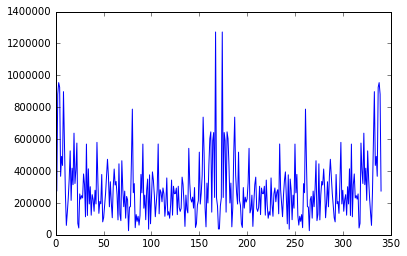

-6682.0 == -6682.0
-13339.0 == -13339.0
-565.0 == -565.0
-17667.0 == -17667.0
5562.0 == 5562.0
17685.0 == 17685.0
11589.0 == 11589.0
-723.0 == -723.0
17405.0 == 17405.0
31811.0 == 31811.0
22908.0 == 22908.0
25433.0 == 25433.0
28003.0 == 28003.0
24429.0 == 24429.0
32607.0 == 32607.0
10367.0 == 10367.0
-28888.0 == -28888.0
-30577.0 == -30577.0
-25464.0 == -25464.0
22684.0 == 22684.0
-22696.0 == -22696.0
-32345.0 == -32345.0
-20607.0 == -20607.0
-81.0000000001 == -81.0
-19201.0 == -19201.0
-8780.0 == -8780.0
-18467.0 == -18467.0
14519.0 == 14519.0
-18376.0 == -18376.0
15288.0 == 15288.0
-18885.0 == -18885.0
8118.0 == 8118.0
-19937.0 == -19937.0
10418.0 == 10418.0
-21464.0 == -21464.0
-24404.0 == -24404.0
-23392.0 == -23392.0
-9052.0 == -9052.0
-25636.0 == -25636.0
12443.0 == 12443.0
-28112.0 == -28112.0
-3182.0 == -3182.0
-30733.0 == -30733.0
31367.0 == 31367.0
32122.0 == 32122.0
4989.0 == 4989.0
29459.0 == 29459.0
2163.0 == 2163.0
26888.0 == 26888.0
-26775.0 == -26775.0
24471.0 == 24471.

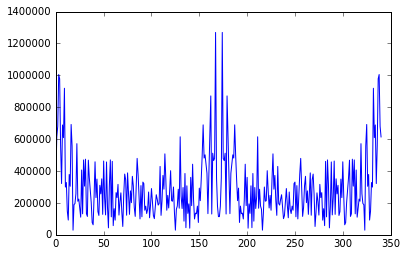

-32748.0 == -32748.0
-23936.0 == -23936.0
30114.0 == 30114.0
32629.0 == 32629.0
27519.0 == 27519.0
619.0 == 619.0
25090.0 == 25090.0
32610.0 == 32610.0
22911.0 == 22911.0
20057.0 == 20057.0
21070.0 == 21070.0
-16814.0 == -16814.0
19646.0 == 19646.0
6988.0 == 6988.0
18715.0 == 18715.0
-22967.0 == -22967.0
18342.0 == 18342.0
-27833.0 == -27833.0
18579.0 == 18579.0
3144.0 == 3144.0
19468.0 == 19468.0
10316.0 == 10316.0
21032.0 == 21032.0
-3758.0 == -3758.0
23281.0 == 23281.0
23642.0 == 23642.0
26204.0 == 26204.0
20582.0 == 20582.0
29776.0 == 29776.0
-23948.0 == -23948.0
-31582.0 == -31582.0
6020.0 == 6020.0
-26857.0 == -26857.0
26007.0 == 26007.0
-21659.0 == -21659.0
13995.0 == 13995.0
-16074.0 == -16074.0
10433.0 == 10433.0
-10200.0 == -10200.0
-11048.0 == -11048.0
-4140.0 == -4140.0
-13329.0 == -13329.0
1995.0 == 1995.0
-25081.0 == -25081.0
8094.0 == 8094.0
-8673.0 == -8673.0
14046.0 == 14046.0
8246.0 == 8246.0
19744.0 == 19744.0
77.0 == 77.0
25088.0 == 25088.0
9058.0 == 9058.0
29987.0 

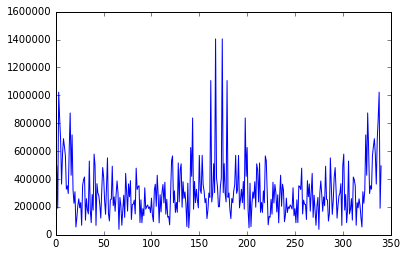

-13892.0 == -13892.0
27593.0 == 27593.0
-14229.0 == -14229.0
-15160.0 == -15160.0
-14396.0 == -14396.0
-24121.0 == -24121.0
-14431.0 == -14431.0
-10553.0 == -10553.0
-14378.0 == -14378.0
13255.0 == 13255.0
-14285.0 == -14285.0
-31800.0 == -31800.0
-14205.0 == -14205.0
-28472.0 == -28472.0
-14192.0 == -14192.0
9928.0 == 9928.0
-14298.0 == -14298.0
5320.0 == 5320.0
-14572.0 == -14572.0
11975.0 == 11975.0
-15058.0 == -15058.0
21189.0 == 21189.0
-15790.0 == -15790.0
25794.0 == 25794.0
-16796.0 == -16796.0
21950.0 == 21950.0
-18091.0 == -18091.0
9145.0 == 9145.0
-19677.0 == -19677.0
-10317.0 == -10317.0
-21545.0 == -21545.0
-30549.0 == -30549.0
-23672.0 == -23672.0
23459.0 == 23459.0
-26021.0 == -26021.0
32666.0 == 32666.0
-28545.0 == -28545.0
12432.0 == 12432.0
-31184.0 == -31184.0
-19322.0 == -19322.0
31668.0 == 31668.0
22907.0 == 22907.0
29017.0 == 29017.0
29041.0 == 29041.0
26481.0 == 26481.0
21095.0 == 21095.0
24146.0 == 24146.0
21086.0 == 21086.0
22098.0 == 22098.0
-15018.0 == -15018.

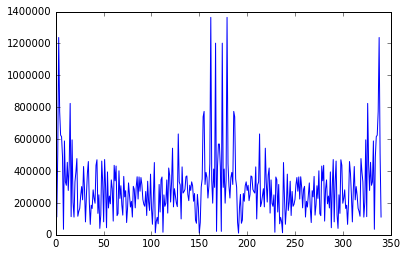

13836.0 == 13836.0
-9674.0 == -9674.0
13274.0 == 13274.0
-12749.0 == -12749.0
12494.0 == 12494.0
-8400.0 == -8400.0
11487.0 == 11487.0
4140.0 == 4140.0
10256.0 == 10256.0
28200.0 == 28200.0
8814.0 == 8814.0
3362.0 == 3362.0
7181.0 == 7181.0
3100.0 == 3100.0
5388.0 == 5388.0
-28395.0 == -28395.0
3473.0 == 3473.0
-15091.0 == -15091.0
1477.0 == 1477.0
-10491.0 == -10491.0
-553.0 == -553.0
-2307.0 == -2307.0
-2570.0 == -2570.0
20725.0 == 20725.0
-4528.0 == -4528.0
4846.0 == 4846.0
-6382.0 == -6382.0
25831.0 == 25831.0
-8092.0 == -8092.0
26848.0 == 26848.0
-9624.0 == -9624.0
14042.0 == 14042.0
-10954.0 == -10954.0
-7979.0 == -7979.0
-12064.0 == -12064.0
28112.0 == 28112.0
-12947.0 == -12947.0
-9523.0 == -9523.0
-13606.0 == -13606.0
6602.0 == 6602.0
-14055.0 == -14055.0
5065.0 == 5065.0
-14317.0 == -14317.0
-22584.0 == -22584.0
-14425.0 == -14425.0
-20537.0 == -20537.0
-14417.0 == -14417.0
-1081.0 == -1081.0
-14341.0 == -14341.0
22983.0 == 22983.0
-14247.0 == -14247.0
-27704.0 == -27704.0
-1

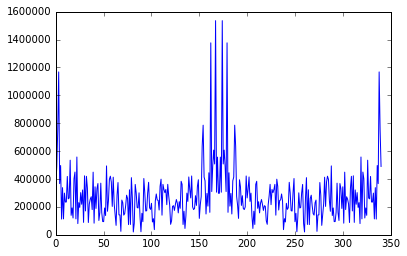

32406.0 == 32406.0
10622.0 == 10622.0
29737.0 == 29737.0
4468.0 == 4468.0
27153.0 == 27153.0
-29334.0 == -29334.0
24717.0 == 24717.0
-11168.0 == -11168.0
22484.0 == 22484.0
3671.0 == 3671.0
20494.0 == 20494.0
22864.0 == 22864.0
18777.0 == 18777.0
-14775.0 == -14775.0
17350.0 == 17350.0
21827.0 == 21827.0
16213.0 == 16213.0
-193.0 == -193.0
15359.0 == 15359.0
-21189.0 == -21189.0
14765.0 == 14765.0
16441.0 == 16441.0
14400.0 == 14400.0
-28872.0 == -28872.0
14223.0 == 14223.0
27703.0 == 27703.0
14188.0 == 14188.0
-23497.0 == -23497.0
14244.0 == 14244.0
311.0 == 311.0
14337.0 == 14337.0
20280.0 == 20280.0
14415.0 == 14415.0
23096.0 == 23096.0
14426.0 == 14426.0
-3016.0 == -3016.0
14324.0 == 14324.0
-2761.0 == -2761.0
14069.0 == 14069.0
15158.0 == 15158.0
13627.0 == 13627.0
-20427.0 == -20427.0
12976.0 == 12976.0
17970.0 == 17970.0
12102.0 == 12102.0
-1745.0 == -1745.0
11001.0 == 11001.0
-12502.0 == -12502.0
9679.0 == 9679.0
-9691.0 == -9691.0
8154.0 == 8154.0
13087.0 == 13087.0
6451.0 == 

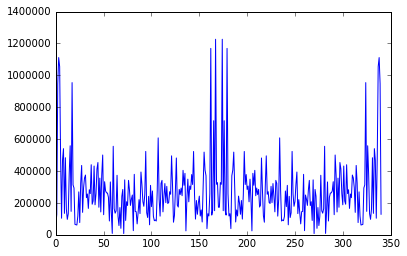

7455.0 == 7455.0
29469.0 == 29469.0
13427.0 == 13427.0
-10956.0 == -10956.0
19157.0 == 19157.0
-8630.0 == -8630.0
24542.0 == 24542.0
13663.0 == 13663.0
29493.0 == 29493.0
-30605.0 == -30605.0
-31608.0 == -31608.0
-26748.0 == -26748.0
-27753.0 == -27753.0
11923.0 == 11923.0
-24530.0 == -24530.0
11424.0 == 11424.0
-21972.0 == -21972.0
-32598.0 == -32598.0
-20096.0 == -20096.0
10929.0 == 10929.0
-18902.0 == -18902.0
15798.0 == 15798.0
-18371.0 == -18371.0
-10056.0 == -10056.0
-18472.0 == -18472.0
11191.0 == 11191.0
-19157.0 == -19157.0
29621.0 == 29621.0
-20365.0 == -20365.0
-2128.0 == -2128.0
-22025.0 == -22025.0
937.0 == 937.0
-24061.0 == -24061.0
-4446.0 == -4446.0
-26386.0 == -26386.0
3224.0 == 3224.0
-28916.0 == -28916.0
-19569.0 == -19569.0
-31565.0 == -31565.0
14212.0 == 14212.0
31287.0 == 31287.0
-6534.0 == -6534.0
28646.0 == 28646.0
1135.0 == 1135.0
26116.0 == 26116.0
-12442.0 == -12442.0
23759.0 == 23759.0
30300.0 == 30300.0
21622.0 == 21622.0
8276.0 == 8276.0
19744.0 == 19744.0

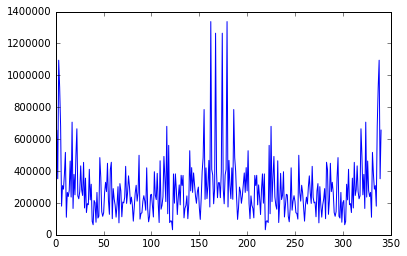

26741.0 == 26741.0
15464.0 == 15464.0
24380.0 == 24380.0
6751.0 == 6751.0
22298.0 == 22298.0
25175.0 == 25175.0
20578.0 == 20578.0
25680.0 == 25680.0
19300.0 == 19300.0
26699.0 == 26699.0
18536.0 == 18536.0
-21432.0 == -21432.0
18348.0 == 18348.0
24903.0 == 24903.0
18785.0 == 18785.0
-21943.0 == -21943.0
19882.0 == 19882.0
-25779.0 == -25779.0
21659.0 == 21659.0
14164.0 == 14164.0
24119.0 == 24119.0
28766.0 == 28766.0
27248.0 == 27248.0
9834.0 == 9834.0
31014.0 == 31014.0
10873.0 == 10873.0
-30166.0 == -30166.0
14986.0 == 14986.0
-25286.0 == -25286.0
2717.0 == 2717.0
-19958.0 == -19958.0
16562.0 == 16562.0
-14272.0 == -14272.0
30920.0 == 30920.0
-8328.0 == -8328.0
18655.0 == 18655.0
-2232.0 == -2232.0
16375.0 == 16375.0
3903.0 == 3903.0
-4081.0 == -4081.0
9968.0 == 9968.0
-5082.0 == -5082.0
15852.0 == 15852.0
-13763.0 == -13763.0
21450.0 == 21450.0
10579.0 == 10579.0
26665.0 == 26665.0
-20120.0 == -20120.0
31409.0 == 31409.0
6778.0 == 6778.0
-29926.0 == -29926.0
9867.0 == 9867.0
-26330

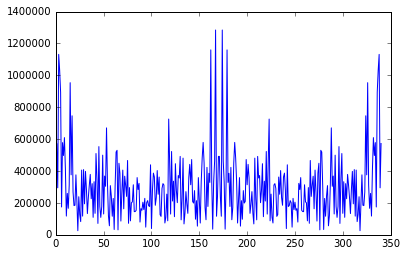

-14419.0 == -14419.0
-21817.0 == -21817.0
-14422.0 == -14422.0
-3641.0 == -3641.0
-14351.0 == -14351.0
20679.0 == 20679.0
-14256.0 == -14256.0
-28472.0 == -28472.0
-14192.0 == -14192.0
32456.0 == 32456.0
-14210.0 == -14210.0
-6968.0 == -6968.0
-14364.0 == -14364.0
-27193.0 == -27193.0
-14699.0 == -14699.0
26310.0 == 26310.0
-15258.0 == -15258.0
14276.0 == 14276.0
-16073.0 == -16073.0
-3903.0 == -3903.0
-17168.0 == -17168.0
-30788.0 == -30788.0
-18553.0 == -18553.0
-1097.0 == -1097.0
-20229.0 == -20229.0
23472.0 == 23472.0
-22181.0 == -22181.0
-15447.0 == -15447.0
-24381.0 == -24381.0
22944.0 == 22944.0
-26791.0 == -26791.0
21143.0 == 21143.0
-29358.0 == -29358.0
-4467.0 == -4467.0
-32018.0 == -32018.0
29826.0 == 29826.0
30836.0 == 30836.0
13176.0 == 13176.0
28211.0 == 28211.0
-32658.0 == -32658.0
25728.0 == 25728.0
-20124.0 == -20124.0
23473.0 == 23473.0
7259.0 == 7259.0
21532.0 == 21532.0
4948.0 == 4948.0
19987.0 == 19987.0
-7090.0 == -7090.0
18916.0 == 18916.0
-11959.0 == -11959.0
18

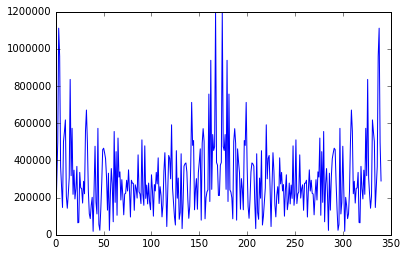

12205.0 == 12205.0
30767.0 == 30767.0
11128.0 == 11128.0
25899.0 == 25899.0
9829.0 == 9829.0
-31706.0 == -31706.0
8324.0 == 8324.0
-4576.0 == -4576.0
6638.0 == 6638.0
-15591.0 == -15591.0
4803.0 == 4803.0
10770.0 == 10770.0
2858.0 == 2858.0
19979.0 == 19979.0
846.0 == 846.0
24323.0 == 24323.0
-1185.0 == -1185.0
-29445.0 == -29445.0
-3188.0 == -3188.0
755.0 == 755.0
-5118.0 == -5118.0
-4628.0 == -4628.0
-6931.0 == -6931.0
29668.0 == 29668.0
-8589.0 == -8589.0
-19490.0 == -19490.0
-10061.0 == -10061.0
-14888.0 == -14888.0
-11323.0 == -11323.0
-18989.0 == -18989.0
-12363.0 == -12363.0
-30513.0 == -30513.0
-13176.0 == -13176.0
14540.0 == 14540.0
-13768.0 == -13768.0
-19254.0 == -19254.0
-14156.0 == -14156.0
-7480.0 == -7480.0
-14366.0 == -14366.0
-24377.0 == -24377.0
-14432.0 == -14432.0
-15673.0 == -15673.0
-14398.0 == -14398.0
6599.0 == 6599.0
-14311.0 == -14311.0
29128.0 == 29128.0
-14223.0 == -14223.0
-26936.0 == -26936.0
-14186.0 == -14186.0
20936.0 == 20936.0
-14255.0 == -14255.0
291

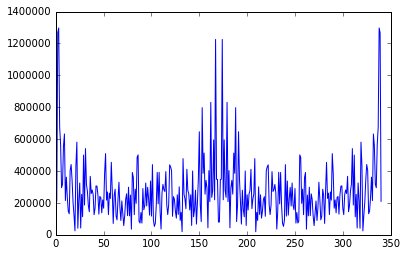

26376.0 == 26376.0
-16793.0 == -16793.0
23998.0 == 23998.0
19805.0 == 19805.0
21837.0 == 21837.0
-9899.0 == -9899.0
19929.0 == 19929.0
32333.0 == 32333.0
18302.0 == 18302.0
17735.0 == 17735.0
16965.0 == 16965.0
11842.0 == 11842.0
15918.0 == 15918.0
11070.0 == 11070.0
15147.0 == 15147.0
9275.0 == 9275.0
14628.0 == 14628.0
-2503.0 == -2503.0
14326.0 == 14326.0
30519.0 == 30519.0
14199.0 == 14199.0
30263.0 == 30263.0
14198.0 == 14198.0
-16329.0 == -16329.0
14272.0 == 14272.0
7735.0 == 7735.0
14366.0 == 14366.0
23608.0 == 23608.0
14428.0 == 14428.0
18488.0 == 18488.0
14408.0 == 14408.0
-18632.0 == -18632.0
14263.0 == 14263.0
-32713.0 == -32713.0
13952.0 == 13952.0
-30666.0 == -30666.0
13448.0 == 13448.0
-18380.0 == -18380.0
12728.0 == 12728.0
1841.0 == 1841.0
11783.0 == 11783.0
29742.0 == 29742.0
10612.0 == 10612.0
2345.0 == 2345.0
9225.0 == 9225.0
-9692.0 == -9692.0
7642.0 == 7642.0
285.0 == 285.0
5889.0 == 5889.0
-23785.0 == -23785.0
4003.0 == 4003.0
-6129.0 == -6129.0
2024.0 == 2024.0
-

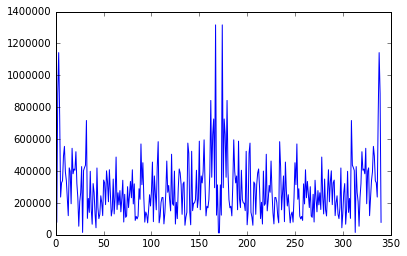

20875.0 == 20875.0
5713.0 == 5713.0
26134.0 == 26134.0
-11162.0 == -11162.0
30932.0 == 30932.0
31096.0 == 31096.0
-30343.0 == -30343.0
-14199.0 == -14199.0
-26680.0 == -26680.0
-27753.0 == -27753.0
-23661.0 == -23661.0
-16989.0 == -16989.0
-21315.0 == -21315.0
15532.0 == 15532.0
-19652.0 == -19652.0
5555.0 == 5555.0
-18667.0 == -18667.0
24503.0 == 24503.0
-18337.0 == -18337.0
16056.0 == 16056.0
-18626.0 == -18626.0
-5961.0 == -5961.0
-19480.0 == -19480.0
-25677.0 == -25677.0
-20837.0 == -20837.0
-24146.0 == -24146.0
-22623.0 == -22623.0
19111.0 == 19111.0
-24758.0 == -24758.0
-4961.0 == -4961.0
-27156.0 == -27156.0
-9067.0 == -9067.0
-29732.0 == -29732.0
28555.0 == 28555.0
-32401.0 == -32401.0
-1663.0 == -1663.0
30457.0 == 30457.0
-15498.0 == -15498.0
27843.0 == 27843.0
4460.0 == 4460.0
25361.0 == 25361.0
7267.0 == 7267.0
23068.0 == 23068.0
4186.0 == 4186.0
21008.0 == 21008.0
4178.0 == 4178.0
19216.0 == 19216.0
11339.0 == 11339.0
17708.0 == 17708.0
28229.0 == 28229.0
16494.0 == 16494.0

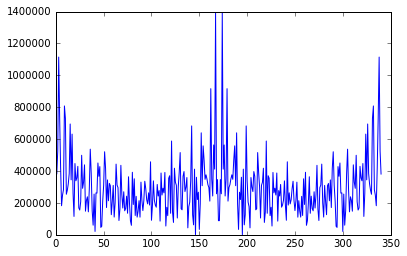

21720.0 == 21720.0
-24236.0 == -24236.0
20129.0 == 20129.0
15438.0 == 15438.0
19004.0 == 19004.0
-4790.0 == -4790.0
18413.0 == 18413.0
-4281.0 == -4281.0
18415.0 == 18415.0
28231.0 == 28231.0
19054.0 == 19054.0
-30134.0 == -30134.0
20362.0 == 20362.0
20559.0 == 20559.0
22352.0 == 22352.0
-16553.0 == -16553.0
25023.0 == 25023.0
-15775.0 == -15775.0
28354.0 == 28354.0
13934.0 == 13934.0
32310.0 == 32310.0
-7042.0 == -7042.0
-28700.0 == -28700.0
-30321.0 == -30321.0
-23671.0 == -23671.0
-11357.0 == -11357.0
-18221.0 == -18221.0
25784.0 == 25784.0
-12444.0 == -12444.0
-10289.0 == -10289.0
-6441.0 == -6441.0
-16410.0 == -16410.0
-321.0 == -321.0
-21250.0 == -21250.0
5804.0 == 5804.0
12566.0 == 12566.0
11825.0 == 11825.0
-8402.0 == -8402.0
17631.0 == 17631.0
20292.0 == 20292.0
23119.0 == 23119.0
9306.0 == 9306.0
28196.0 == 28196.0
2926.0 == 2926.0
-32757.0 == -32757.0
-17280.0 == -17280.0
-28740.0 == -28740.0
911.0 == 911.0
-25341.0 == -25341.0
-18275.0 == -18275.0
-22600.0 == -22600.0
-1468

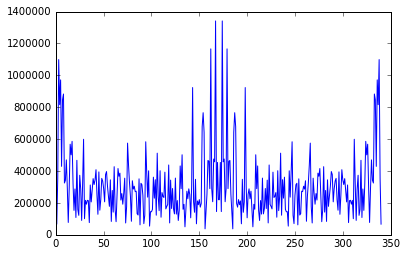

-14321.0 == -14321.0
27080.0 == 27080.0
-14231.0 == -14231.0
-26936.0 == -26936.0
-14186.0 == -14186.0
24520.0 == 24520.0
-14241.0 == -14241.0
-27960.0 == -27960.0
-14446.0 == -14446.0
455.0 == 455.0
-14847.0 == -14847.0
-31290.0 == -31290.0
-15483.0 == -15483.0
451.0 == 451.0
-16383.0 == -16383.0
24768.0 == 24768.0
-17568.0 == -17568.0
-25413.0 == -25413.0
-19044.0 == -19044.0
-18251.0 == -18251.0
-20808.0 == -20808.0
-14418.0 == -14418.0
-22841.0 == -22841.0
-5978.0 == -5978.0
-25112.0 == -25112.0
18589.0 == 18589.0
-27576.0 == -27576.0
7572.0 == 7572.0
-30179.0 == -30179.0
-22134.0 == -22134.0
32681.0 == 32681.0
14463.0 == 14463.0
30008.0 == 30008.0
7029.0 == 7029.0
27419.0 == 27419.0
-22933.0 == -22933.0
24998.0 == 24998.0
12129.0 == 12129.0
22831.0 == 22831.0
3417.0 == 3417.0
21005.0 == 21005.0
-28846.0 == -28846.0
19599.0 == 19599.0
332.0 == 332.0
18689.0 == 18689.0
-23735.0 == -23735.0
18339.0 == 18339.0
-21945.0 == -21945.0
18602.0 == 18602.0
15688.0 == 15688.0
19517.0 == 19517

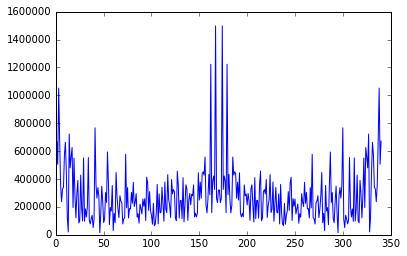

9382.0 == 9382.0
-30428.0 == -30428.0
7817.0 == 7817.0
-16098.0 == -16098.0
6081.0 == 6081.0
28439.0 == 28439.0
4207.0 == 4207.0
-17392.0 == -17392.0
2236.0 == 2236.0
-11000.0 == -11000.0
213.0 == 213.0
-5632.0 == -5632.0
-1814.0 == -1814.0
10744.0 == 10744.0
-3799.0 == -3799.0
-16399.0 == -16399.0
-5697.0 == -5697.0
-10519.0 == -10519.0
-7466.0 == -7466.0
-27678.0 == -27678.0
-9069.0 == -9069.0
5084.0 == 5084.0
-10477.0 == -10477.0
27095.0 == 27095.0
-11671.0 == -11671.0
-24366.0 == -24366.0
-12640.0 == -12640.0
-17970.0 == -17970.0
-13383.0 == -13383.0
-21557.0 == -21557.0
-13909.0 == -13909.0
25033.0 == 25033.0
-14239.0 == -14239.0
-16184.0 == -16184.0
-14400.0 == -14400.0
-24121.0 == -24121.0
-14431.0 == -14431.0
-9785.0 == -9785.0
-14375.0 == -14375.0
14279.0 == 14279.0
-14281.0 == -14281.0
-31288.0 == -31288.0
-14203.0 == -14203.0
-28984.0 == -28984.0
-14194.0 == -14194.0
7880.0 == 7880.0
-14306.0 == -14306.0
1480.0 == 1480.0
-14587.0 == -14587.0
5831.0 == 5831.0
-15082.0 == -150

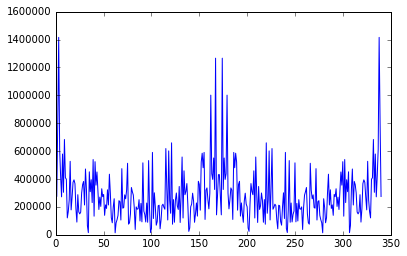

21214.0 == 21214.0
-16302.0 == -16302.0
19392.0 == 19392.0
-16821.0 == -16821.0
17854.0 == 17854.0
-8123.0 == -8123.0
16608.0 == 16608.0
8512.0 == 8512.0
15649.0 == 15649.0
28733.0 == 28733.0
14960.0 == 14960.0
-20166.0 == -20166.0
14513.0 == 14513.0
-16840.0 == -16840.0
14270.0 == 14270.0
27703.0 == 27703.0
14188.0 == 14188.0
-30665.0 == -30665.0
14216.0 == 14216.0
-8905.0 == -8905.0
14301.0 == 14301.0
14135.0 == 14135.0
14391.0 == 14391.0
24888.0 == 24888.0
14433.0 == 14433.0
11064.0 == 11064.0
14379.0 == 14379.0
26936.0 == 26936.0
14185.0 == 14185.0
-1737.0 == -1737.0
13817.0 == 13817.0
-16331.0 == -16331.0
13248.0 == 13248.0
-21709.0 == -21709.0
12459.0 == 12459.0
-19664.0 == -19664.0
11443.0 == 11443.0
-9428.0 == -9428.0
10203.0 == 10203.0
12327.0 == 12327.0
8752.0 == 8752.0
-14302.0 == -14302.0
7112.0 == 7112.0
-15845.0 == -15845.0
5314.0 == 5314.0
16916.0 == 16916.0
3394.0 == 3394.0
29709.0 == 29709.0
1396.0 == 1396.0
-31227.0 == -31227.0
-634.0 == -634.0
-22787.0 == -22787.0
-2

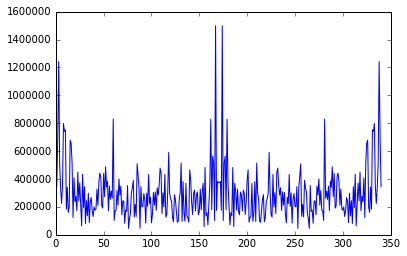

32320.0 == 32320.0
12414.0 == 12414.0
-29136.0 == -29136.0
-17522.0 == -17522.0
-25669.0 == -25669.0
-18789.0 == -18789.0
-22858.0 == -22858.0
3494.0 == 3494.0
-20723.0 == -20723.0
-18513.0 == -18513.0
-19273.0 == -19273.0
-15948.0 == -15948.0
-18495.0 == -18495.0
17847.0 == 17847.0
-18363.0 == -18363.0
28344.0 == 28344.0
-18834.0 == -18834.0
29878.0 == 29878.0
-19852.0 == -19852.0
-26190.0 == -26190.0
-21351.0 == -21351.0
10924.0 == 10924.0
-23254.0 == -23254.0
30885.0 == 30885.0
-25480.0 == -25480.0
-9828.0 == -9828.0
-27943.0 == -27943.0
-23662.0 == -23662.0
-30557.0 == -30557.0
11144.0 == 11144.0
32299.0 == 32299.0
-16002.0 == -16002.0
29633.0 == 29633.0
-21133.0 == -21133.0
27053.0 == 27053.0
12393.0 == 12393.0
24624.0 == 24624.0
-32672.0 == -32672.0
22400.0 == 22400.0
-15273.0 == -15273.0
20420.0 == 20420.0
6991.0 == 6991.0
18715.0 == 18715.0
-27831.0 == -27831.0
17299.0 == 17299.0
11843.0 == 11843.0
16174.0 == 16174.0
-7361.0 == -7361.0
15331.0 == 15331.0
-26053.0 == -26053.0
14

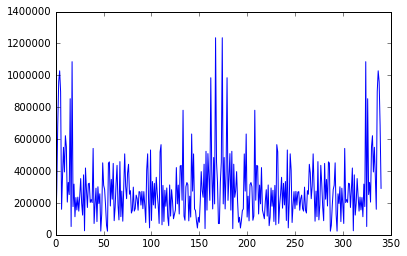

18760.0 == 18760.0
-21431.0 == -21431.0
18348.0 == 18348.0
28743.0 == 28743.0
18544.0 == 18544.0
-17080.0 == -17080.0
19389.0 == 19389.0
-21429.0 == -21429.0
20908.0 == 20908.0
18257.0 == 18257.0
23111.0 == 23111.0
-30886.0 == -30886.0
25991.0 == 25991.0
20837.0 == 20837.0
29521.0 == 29521.0
32115.0 == 32115.0
-31875.0 == -31875.0
-12157.0 == -12157.0
-27184.0 == -27184.0
405.0 == 405.0
-22015.0 == -22015.0
-17494.0 == -17494.0
-16453.0 == -16453.0
-24897.0 == -24897.0
-10594.0 == -10594.0
16854.0 == 16854.0
-4543.0 == -4543.0
14062.0 == 14062.0
1590.0 == 1590.0
4102.0 == 4102.0
7696.0 == 7696.0
23582.0 == 23582.0
13660.0 == 13660.0
-19915.0 == -19915.0
19378.0 == 19378.0
-21429.0 == -21429.0
24748.0 == 24748.0
-4000.0 == -4000.0
29680.0 == 29680.0
11635.0 == 11635.0
-31443.0 == -31443.0
9093.0 == 9093.0
-27613.0 == -27613.0
-24172.0 == -24172.0
-24415.0 == -24415.0
-31584.0 == -31584.0
-21884.0 == -21884.0
-17238.0 == -17238.0
-20036.0 == -20036.0
19633.0 == 19633.0
-18868.0 == -18868

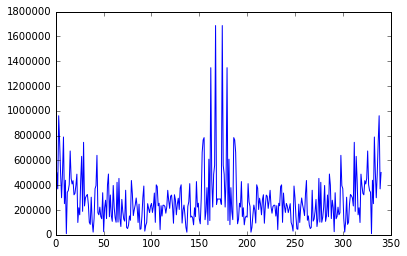

-14190.0 == -14190.0
12744.0 == 12744.0
-14287.0 == -14287.0
11464.0 == 11464.0
-14548.0 == -14548.0
22215.0 == 22215.0
-15018.0 == -15018.0
-30011.0 == -30011.0
-15734.0 == -15734.0
-20542.0 == -20542.0
-16721.0 == -16721.0
-19266.0 == -19266.0
-17996.0 == -17996.0
-27207.0 == -27207.0
-19563.0 == -19563.0
23475.0 == 23475.0
-21413.0 == -21413.0
7340.0 == 7340.0
-23524.0 == -23524.0
-1116.0 == -1116.0
-25861.0 == -25861.0
10650.0 == 10650.0
-28375.0 == -28375.0
-8047.0 == -8047.0
-31008.0 == -31008.0
25990.0 == 25990.0
31845.0 == 31845.0
1404.0 == 1404.0
29189.0 == 29189.0
4978.0 == 4978.0
26643.0 == 26643.0
-7064.0 == -7064.0
24292.0 == 24292.0
-12706.0 == -12706.0
22222.0 == 22222.0
9814.0 == 9814.0
20518.0 == 20518.0
15440.0 == 15440.0
19260.0 == 19260.0
22091.0 == 22091.0
18518.0 == 18518.0
-20152.0 == -20152.0
18353.0 == 18353.0
-32697.0 == -32697.0
18816.0 == 18816.0
-7095.0 == -7095.0
19940.0 == 19940.0
-4019.0 == -4019.0
21744.0 == 21744.0
-22700.0 == -22700.0
24231.0 == 24231

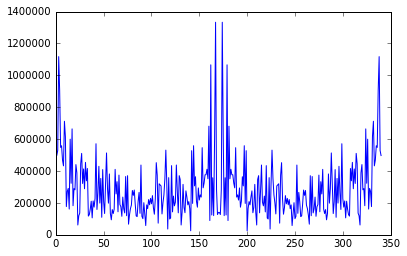

5510.0 == 5510.0
4629.0 == 4629.0
3602.0 == 3602.0
18958.0 == 18958.0
1610.0 == 1610.0
23814.0 == 23814.0
-419.0 == -419.0
31230.0 == 31230.0
-2439.0 == -2439.0
-12554.0 == -12554.0
-4402.0 == -4402.0
-30226.0 == -30226.0
-6263.0 == -6263.0
-12057.0 == -12057.0
-7984.0 == -7984.0
-14368.0 == -14368.0
-9529.0 == -9529.0
-30758.0 == -30758.0
-10873.0 == -10873.0
9173.0 == 9173.0
-11997.0 == -11997.0
-24111.0 == -24111.0
-12895.0 == -12895.0
-51.0000000001 == -51.0
-13569.0 == -13569.0
12490.0 == 12490.0
-14032.0 == -14032.0
8137.0 == 8137.0
-14305.0 == -14305.0
-21560.0 == -21560.0
-14421.0 == -14421.0
-21305.0 == -21305.0
-14420.0 == -14420.0
-2617.0 == -2617.0
-14347.0 == -14347.0
21447.0 == 21447.0
-14253.0 == -14253.0
-28216.0 == -28216.0
-14191.0 == -14191.0
31688.0 == 31688.0
-14213.0 == -14213.0
-9272.0 == -9272.0
-14373.0 == -14373.0
-31801.0 == -31801.0
-14717.0 == -14717.0
19398.0 == 19398.0
-15285.0 == -15285.0
4548.0 == 4548.0
-16111.0 == -16111.0
-16447.0 == -16447.0
-17217.

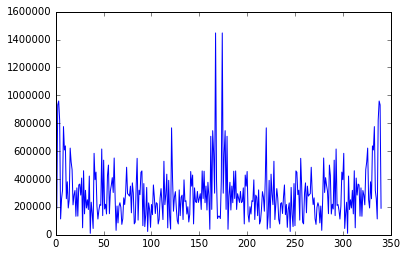

17435.0 == 17435.0
-26556.0 == -26556.0
16280.0 == 16280.0
12095.0 == 12095.0
15407.0 == 15407.0
-12996.0 == -12996.0
14797.0 == 14797.0
20793.0 == 20793.0
14417.0 == 14417.0
-27080.0 == -27080.0
14230.0 == 14230.0
27447.0 == 27447.0
14187.0 == 14187.0
-24777.0 == -24777.0
14239.0 == 14239.0
-1225.0 == -1225.0
14331.0 == 14331.0
19255.0 == 19255.0
14411.0 == 14411.0
23608.0 == 23608.0
14428.0 == 14428.0
-200.0 == -200.0
14335.0 == 14335.0
2871.0 == 2871.0
14091.0 == 14091.0
24375.0 == 24375.0
13663.0 == 13663.0
-7627.0 == -7627.0
13026.0 == 13026.0
-30926.0 == -30926.0
12167.0 == 12167.0
18479.0 == 18479.0
11080.0 == 11080.0
11563.0 == 11563.0
9773.0 == 9773.0
17702.0 == 17702.0
8261.0 == 8261.0
-22496.0 == -22496.0
6568.0 == 6568.0
30489.0 == 30489.0
4727.0 == 4727.0
-9454.0 == -9454.0
2779.0 == 2779.0
-758.0 == -758.0
765.0 == 765.0
3842.0 == 3842.0
-1265.0 == -1265.0
15867.0 == 15867.0
-3267.0 == -3267.0
-18445.0 == -18445.0
-5193.0 == -5193.0
-22293.0 == -22293.0
-7000.0 == -7000.0

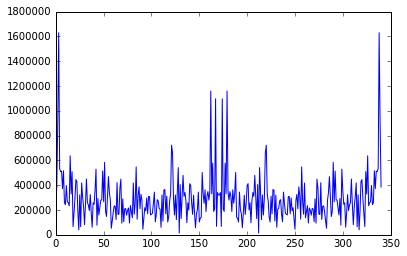

-24722.0 == -24722.0
-26465.0 == -26465.0
-22120.0 == -22120.0
6569.0 == 6569.0
-20199.0 == -20199.0
-3919.0 == -3919.0
-18960.0 == -18960.0
11701.0 == 11701.0
-18387.0 == -18387.0
-3656.0 == -3656.0
-18447.0 == -18447.0
27063.0 == 27063.0
-19095.0 == -19095.0
-11595.0 == -11595.0
-20270.0 == -20270.0
28848.0 == 28848.0
-21904.0 == -21904.0
-27734.0 == -27734.0
-23917.0 == -23917.0
-29022.0 == -29022.0
-26226.0 == -26226.0
-18535.0 == -18535.0
-28745.0 == -28745.0
25743.0 == 25743.0
-31388.0 == -31388.0
-6011.0 == -6011.0
31464.0 == 31464.0
-28294.0 == -28294.0
28817.0 == 28817.0
-22928.0 == -22928.0
26278.0 == 26278.0
25702.0 == 25702.0
23908.0 == 23908.0
-931.0 == -931.0
21756.0 == 21756.0
-27820.0 == -27820.0
19859.0 == 19859.0
17229.0 == 17229.0
18243.0 == 18243.0
5703.0 == 5703.0
16918.0 == 16918.0
2626.0 == 2626.0
15882.0 == 15882.0
4670.0 == 4670.0
15122.0 == 15122.0
5435.0 == 5435.0
14613.0 == 14613.0
-4551.0 == -4551.0
14318.0 == 14318.0
30007.0 == 30007.0
14197.0 == 14197.0
3

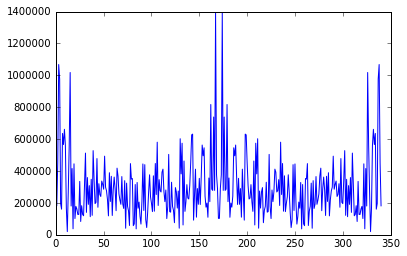

18736.0 == 18736.0
19785.0 == 19785.0
19789.0 == 19789.0
4429.0 == 4429.0
21521.0 == 21521.0
-32684.0 == -32684.0
23936.0 == 23936.0
-29091.0 == -29091.0
27022.0 == 27022.0
7017.0 == 7017.0
30747.0 == 30747.0
-1416.0 == -1416.0
-30470.0 == -30470.0
-5496.0 == -5496.0
-25622.0 == -25622.0
-24677.0 == -24677.0
-20321.0 == -20321.0
-15952.0 == -15952.0
-14655.0 == -14655.0
-5178.0 == -5178.0
-8725.0 == -8725.0
-19235.0 == -19235.0
-2636.0 == -2636.0
-21259.0 == -21259.0
3500.0 == 3500.0
25869.0 == 25869.0
9573.0 == 9573.0
28709.0 == 28709.0
15472.0 == 15472.0
25660.0 == 25660.0
21092.0 == 21092.0
-8366.0 == -8366.0
26335.0 == 26335.0
-30362.0 == -30362.0
31113.0 == 31113.0
6009.0 == 6009.0
-30185.0 == -30185.0
19850.0 == 19850.0
-26547.0 == -26547.0
-616.0 == -616.0
-23555.0 == -23555.0
3491.0 == 3491.0
-21235.0 == -21235.0
28845.0 == 28845.0
-19600.0 == -19600.0
12211.0 == 12211.0
-18641.0 == -18641.0
24503.0 == 24503.0
-18337.0 == -18337.0
10168.0 == 10168.0
-18649.0 == -18649.0
-17481.

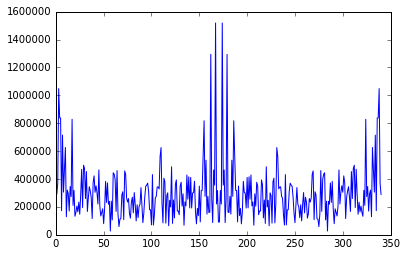

-14670.0 == -14670.0
-27706.0 == -27706.0
-15213.0 == -15213.0
30148.0 == 30148.0
-16011.0 == -16011.0
16833.0 == 16833.0
-17087.0 == -17087.0
-5187.0 == -5187.0
-18453.0 == -18453.0
29367.0 == 29367.0
-20110.0 == -20110.0
-6991.0 == -6991.0
-22044.0 == -22044.0
23209.0 == 23209.0
-24230.0 == -24230.0
-607.0 == -607.0
-26627.0 == -26627.0
-105.0 == -105.0
-29185.0 == -29185.0
-24691.0 == -24691.0
-31841.0 == -31841.0
9347.0 == 9347.0
31012.0 == 31012.0
-8839.0 == -8839.0
28381.0 == 28381.0
7790.0 == 7790.0
25886.0 == 25886.0
15717.0 == 15717.0
23613.0 == 23613.0
-28324.0 == -28324.0
21649.0 == 21649.0
27476.0 == 27476.0
20075.0 == 20075.0
6734.0 == 6734.0
18970.0 == 18970.0
-7606.0 == -7606.0
18402.0 == 18402.0
-953.0 == -953.0
18428.0 == 18428.0
-27321.0 == -27321.0
19093.0 == 19093.0
-13238.0 == -13238.0
20428.0 == 20428.0
-21169.0 == -21169.0
22445.0 == 22445.0
14167.0 == 14167.0
25143.0 == 25143.0
21602.0 == 21602.0
28500.0 == 28500.0
-8337.0 == -8337.0
32479.0 == 32479.0
-23682.0 

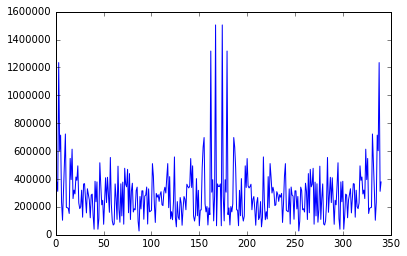

980.0 == 980.0
-6909.0 == -6909.0
-1051.0 == -1051.0
3835.0 == 3835.0
-3058.0 == -3058.0
32500.0 == 32500.0
-4994.0 == -4994.0
24812.0 == 24812.0
-6816.0 == -6816.0
-9243.0 == -9243.0
-8485.0 == -8485.0
3806.0 == 3806.0
-9970.0 == -9970.0
4569.0 == 4569.0
-11247.0 == -11247.0
-3116.0 == -3116.0
-12301.0 == -12301.0
-18481.0 == -18481.0
-13129.0 == -13129.0
22988.0 == 22988.0
-13735.0 == -13735.0
-14134.0 == -14134.0
-14136.0 == -14136.0
-5176.0 == -5176.0
-14357.0 == -14357.0
-24377.0 == -24377.0
-14432.0 == -14432.0
-16953.0 == -16953.0
-14403.0 == -14403.0
4807.0 == 4807.0
-14318.0 == -14318.0
27848.0 == 27848.0
-14228.0 == -14228.0
-26936.0 == -26936.0
-14186.0 == -14186.0
23240.0 == 23240.0
-14246.0 == -14246.0
-31032.0 == -31032.0
-14458.0 == -14458.0
-4921.0 == -4921.0
-14868.0 == -14868.0
26309.0 == 26309.0
-15514.0 == -15514.0
-10301.0 == -10301.0
-16425.0 == -16425.0
11199.0 == 11199.0
-17621.0 == -17621.0
23483.0 == 23483.0
-19109.0 == -19109.0
27829.0 == 27829.0
-20884.0 == 

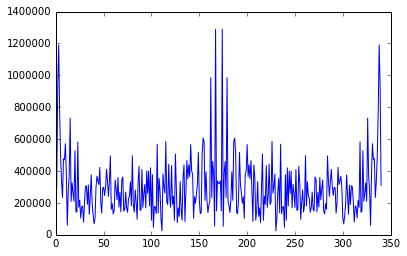

15190.0 == 15190.0
16443.0 == 16443.0
14656.0 == 14656.0
1081.0 == 1081.0
14340.0 == 14340.0
31544.0 == 31544.0
14203.0 == 14203.0
29495.0 == 29495.0
14195.0 == 14195.0
-18121.0 == -18121.0
14265.0 == 14265.0
6199.0 == 6199.0
14360.0 == 14360.0
23096.0 == 23096.0
14426.0 == 14426.0
19768.0 == 19768.0
14413.0 == 14413.0
-15048.0 == -15048.0
14277.0 == 14277.0
-25801.0 == -25801.0
13979.0 == 13979.0
-20426.0 == -20426.0
13488.0 == 13488.0
-4300.0 == -4300.0
12783.0 == 12783.0
19761.0 == 19761.0
11853.0 == 11853.0
-14290.0 == -14290.0
10696.0 == 10696.0
27433.0 == 27433.0
9323.0 == 9323.0
18212.0 == 18212.0
7751.0 == 7751.0
31006.0 == 31006.0
6009.0 == 6009.0
8727.0 == 8727.0
4130.0 == 4130.0
27664.0 == 27664.0
2156.0 == 2156.0
-31736.0 == -31736.0
132.0 == 132.0
-26112.0 == -26112.0
-1894.0 == -1894.0
-9224.0 == -9224.0
-3877.0 == -3877.0
30448.0 == 30448.0
-5770.0 == -5770.0
-27671.0 == -27671.0
-7533.0 == -7533.0
22498.0 == 22498.0
-9129.0 == -9129.0
-8228.0 == -8228.0
-10529.0 == -105

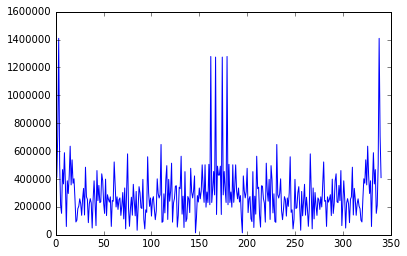

-19740.0 == -19740.0
-5710.0 == -5710.0
-18711.0 == -18711.0
23990.0 == 23990.0
-18339.0 == -18339.0
25784.0 == 25784.0
-18588.0 == -18588.0
12727.0 == 12727.0
-19407.0 == -19407.0
948.0 == 948.0
-20733.0 == -20733.0
9135.0 == 9135.0
-22493.0 == -22493.0
-8024.0 == -8024.0
-24608.0 == -24608.0
-28513.0 == -28513.0
-26992.0 == -26992.0
-30314.0 == -30314.0
-29559.0 == -29559.0
8332.0 == 8332.0
-32224.0 == -32224.0
-22398.0 == -22398.0
30632.0 == 30632.0
27767.0 == 27767.0
28012.0 == 28012.0
-20627.0 == -20627.0
25519.0 == 25519.0
-21405.0 == -21405.0
23212.0 == 23212.0
-28582.0 == -28582.0
21136.0 == 21136.0
32082.0 == 32082.0
19325.0 == 19325.0
-30901.0 == -30901.0
17799.0 == 17799.0
-19131.0 == -19131.0
16565.0 == 16565.0
320.0 == 320.0
15617.0 == 15617.0
23101.0 == 23101.0
14938.0 == 14938.0
-23494.0 == -23494.0
14500.0 == 14500.0
-18376.0 == -18376.0
14264.0 == 14264.0
27447.0 == 27447.0
14187.0 == 14187.0
-30153.0 == -30153.0
14218.0 == 14218.0
-7881.0 == -7881.0
14305.0 == 14305.0

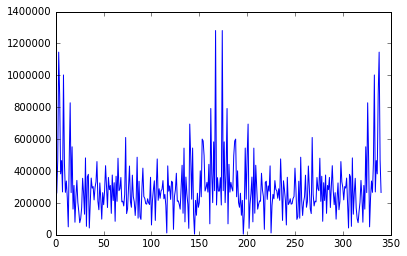

22200.0 == 22200.0
-1450.0 == -1450.0
24826.0 == 24826.0
-11424.0 == -11424.0
28115.0 == 28115.0
8045.0 == 8045.0
32031.0 == 32031.0
-21891.0 == -21891.0
-29014.0 == -29014.0
12430.0 == 12430.0
-24016.0 == -24016.0
24994.0 == 24994.0
-18591.0 == -18591.0
-8265.0 == -8265.0
-12833.0 == -12833.0
18381.0 == 18381.0
-6841.0 == -6841.0
11237.0 == 11237.0
-725.0 == -725.0
7165.0 == 7165.0
5403.0 == 5403.0
-22251.0 == -22251.0
11433.0 == 11433.0
26924.0 == 26924.0
17257.0 == 17257.0
-3773.0 == -3773.0
22769.0 == 22769.0
-7080.0 == -7080.0
27876.0 == 27876.0
-4756.0 == -4756.0
32493.0 == 32493.0
-14722.0 == -14722.0
-28986.0 == -28986.0
14222.0 == 14222.0
-25545.0 == -25545.0
6300.0 == 6300.0
-22760.0 == -22760.0
21415.0 == 21415.0
-20653.0 == -20653.0
-7249.0 == -7249.0
-19229.0 == -19229.0
-11596.0 == -11596.0
-18478.0 == -18478.0
16055.0 == 16055.0
-18370.0 == -18370.0
20664.0 == 20664.0
-18864.0 == -18864.0
16822.0 == 16822.0
-19903.0 == -19903.0
21938.0 == 21938.0
-21419.0 == -21419.0
-10

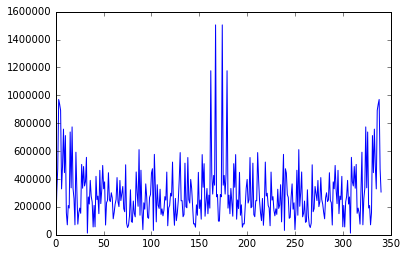

-16315.0 == -16315.0
-18496.0 == -18496.0
-17481.0 == -17481.0
1723.0 == 1723.0
-18938.0 == -18938.0
13750.0 == 13750.0
-20683.0 == -20683.0
21935.0 == 21935.0
-22699.0 == -22699.0
-31321.0 == -31321.0
-24955.0 == -24955.0
-4194.0 == -4194.0
-27409.0 == -27409.0
-13420.0 == -13420.0
-30005.0 == -30005.0
23434.0 == 23434.0
-32677.0 == -32677.0
-6272.0 == -6272.0
30183.0 == 30183.0
-16011.0 == -16011.0
27585.0 == 27585.0
15979.0 == 15979.0
25150.0 == 25150.0
-19358.0 == -19358.0
22964.0 == 22964.0
31065.0 == 31065.0
21113.0 == 21113.0
-8622.0 == -8622.0
19678.0 == 19678.0
11596.0 == 11596.0
18733.0 == 18733.0
-22455.0 == -22455.0
18344.0 == 18344.0
-31417.0 == -31417.0
18565.0 == 18565.0
-5048.0 == -5048.0
19436.0 == 19436.0
-2229.0 == -2229.0
20983.0 == 20983.0
-21167.0 == -21167.0
23213.0 == 23213.0
1882.0 == 1882.0
26119.0 == 26119.0
-5274.0 == -5274.0
29675.0 == 29675.0
11635.0 == 11635.0
-31699.0 == -31699.0
-27260.0 == -27260.0
-26987.0 == -26987.0
-10090.0 == -10090.0
-21800.0 == 

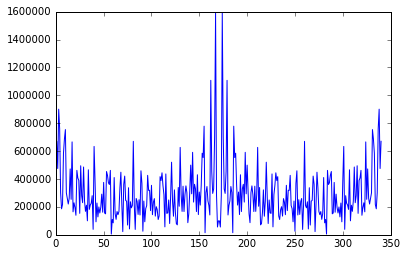

-3671.0 == -3671.0
14577.0 == 14577.0
-5576.0 == -5576.0
18154.0 == 18154.0
-7354.0 == -7354.0
-2077.0 == -2077.0
-8969.0 == -8969.0
27100.0 == 27100.0
-10391.0 == -10391.0
-20265.0 == -20265.0
-11600.0 == -11600.0
-9774.0 == -9774.0
-12583.0 == -12583.0
-7218.0 == -7218.0
-13341.0 == -13341.0
-14389.0 == -14389.0
-13881.0 == -13881.0
29385.0 == 29385.0
-14222.0 == -14222.0
-14648.0 == -14648.0
-14394.0 == -14394.0
-24377.0 == -24377.0
-14432.0 == -14432.0
-11065.0 == -11065.0
-14380.0 == -14380.0
12487.0 == 12487.0
-14288.0 == -14288.0
-32312.0 == -32312.0
-14207.0 == -14207.0
-28216.0 == -28216.0
-14191.0 == -14191.0
10952.0 == 10952.0
-14294.0 == -14294.0
7624.0 == 7624.0
-14563.0 == -14563.0
16071.0 == 16071.0
-15042.0 == -15042.0
26821.0 == 26821.0
-15768.0 == -15768.0
-32062.0 == -32062.0
-16766.0 == -16766.0
31678.0 == 31678.0
-18053.0 == -18053.0
20665.0 == 20665.0
-19632.0 == -19632.0
2995.0 == 2995.0
-21493.0 == -21493.0
-15444.0 == -15444.0
-23613.0 == -23613.0
-25949.0 == -

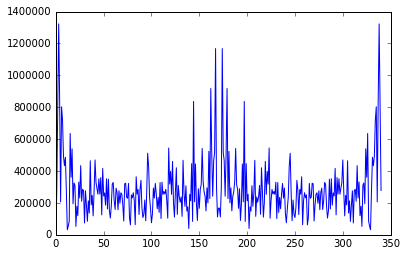

14281.0 == 14281.0
27959.0 == 27959.0
14189.0 == 14189.0
-31945.0 == -31945.0
14211.0 == 14211.0
-10441.0 == -10441.0
14295.0 == 14295.0
12855.0 == 12855.0
14386.0 == 14386.0
24888.0 == 24888.0
14433.0 == 14433.0
12856.0 == 12856.0
14386.0 == 14386.0
31544.0 == 31544.0
14203.0 == 14203.0
6199.0 == 6199.0
13848.0 == 13848.0
-5066.0 == -5066.0
13292.0 == 13292.0
-6861.0 == -6861.0
12517.0 == 12517.0
-720.0 == -720.0
11517.0 == 11517.0
13100.0 == 13100.0
10291.0 == 10291.0
-27096.0 == -27096.0
8854.0 == 8854.0
14882.0 == 14882.0
7226.0 == 7226.0
15644.0 == 15644.0
5437.0 == 5437.0
-15339.0 == -15339.0
3524.0 == 3524.0
-1779.0 == -1779.0
1529.0 == 1529.0
3077.0 == 3077.0
-500.0 == -500.0
11006.0 == 11006.0
-2518.0 == -2518.0
-32010.0 == -32010.0
-4478.0 == -4478.0
16878.0 == 16878.0
-6335.0 == -6335.0
-28697.0 == -28697.0
-8049.0 == -8049.0
-29216.0 == -29216.0
-9587.0 == -9587.0
22234.0 == 22234.0
-10922.0 == -10922.0
-1323.0 == -1323.0
-12038.0 == -12038.0
-32304.0 == -32304.0
-12927.0 =

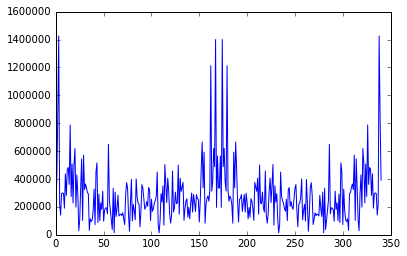

-18353.0 == -18353.0
-24648.0 == -24648.0
-18785.0 == -18785.0
-14410.0 == -14410.0
-19769.0 == -19769.0
2738.0 == 2738.0
-21238.0 == -21238.0
-19795.0 == -19795.0
-23118.0 == -23118.0
5029.0 == 5029.0
-25325.0 == -25325.0
-32355.0 == -32355.0
-27775.0 == -27775.0
21139.0 == 21139.0
-30382.0 == -30382.0
-9079.0 == -9079.0
32476.0 == 32476.0
28286.0 == 28286.0
29806.0 == 29806.0
21364.0 == 21364.0
27219.0 == 27219.0
-13462.0 == -13462.0
24779.0 == 24779.0
2912.0 == 2912.0
22539.0 == 22539.0
16216.0 == 16216.0
20543.0 == 20543.0
-31920.0 == -31920.0
18819.0 == 18819.0
-6327.0 == -6327.0
17383.0 == 17383.0
28739.0 == 28739.0
16240.0 == 16240.0
4671.0 == 4671.0
15378.0 == 15378.0
-18116.0 == -18116.0
14777.0 == 14777.0
18233.0 == 18233.0
14407.0 == 14407.0
-28360.0 == -28360.0
14225.0 == 14225.0
27703.0 == 27703.0
14188.0 == 14188.0
-24009.0 == -24009.0
14242.0 == 14242.0
-201.0 == -201.0
14335.0 == 14335.0
20023.0 == 20023.0
14414.0 == 14414.0
23352.0 == 23352.0
14427.0 == 14427.0
-1736.0

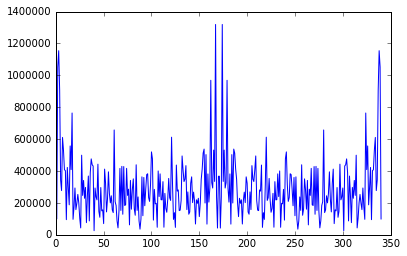

29269.0 == 29269.0
23154.0 == 23154.0
-32166.0 == -32166.0
-29822.0 == -29822.0
-27509.0 == -27509.0
-24684.0 == -24684.0
-22369.0 == -22369.0
17320.0 == 17320.0
-16829.0 == -16829.0
5566.0 == 5566.0
-10987.0 == -10987.0
-20523.0 == -20523.0
-4945.0 == -4945.0
-23828.0 == -23828.0
1186.0 == 1186.0
-32764.0 == -32764.0
7296.0 == 7296.0
-9700.0 == -9700.0
13274.0 == 13274.0
17203.0 == 17203.0
19011.0 == 19011.0
22346.0 == 22346.0
24407.0 == 24407.0
-17825.0 == -17825.0
29370.0 == 29370.0
7026.0 == 7026.0
-31717.0 == -31717.0
14980.0 == 14980.0
-27846.0 == -27846.0
-7533.0 == -7533.0
-24606.0 == -24606.0
-3425.0 == -3425.0
-22030.0 == -22030.0
22697.0 == 22697.0
-20136.0 == -20136.0
5297.0 == 5297.0
-18924.0 == -18924.0
14262.0 == 14262.0
-18377.0 == -18377.0
-7496.0 == -7496.0
-18462.0 == -18462.0
17591.0 == 17591.0
-19132.0 == -19132.0
-26187.0 == -26187.0
-20327.0 == -20327.0
10160.0 == 10160.0
-21977.0 == -21977.0
15786.0 == 15786.0
-24003.0 == -24003.0
11682.0 == 11682.0
-26323.0 == 

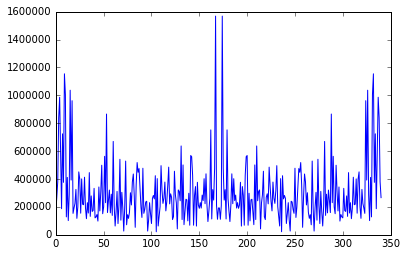

-19451.0 == -19451.0
-8780.0 == -8780.0
-21283.0 == -21283.0
-20820.0 == -20820.0
-23378.0 == -23378.0
-25692.0 == -25692.0
-25701.0 == -25701.0
-11365.0 == -11365.0
-28205.0 == -28205.0
-28527.0 == -28527.0
-30832.0 == -30832.0
5767.0 == 5767.0
32022.0 == 32022.0
-19843.0 == -19843.0
29362.0 == 29362.0
-18830.0 == -18830.0
26806.0 == 26806.0
30568.0 == 30568.0
24439.0 == 24439.0
19551.0 == 19551.0
22348.0 == 22348.0
-30121.0 == -30121.0
20618.0 == 20618.0
-32688.0 == -32688.0
19328.0 == 19328.0
30027.0 == 30027.0
18549.0 == 18549.0
-22200.0 == -22200.0
18345.0 == 18345.0
19783.0 == 19783.0
18765.0 == 18765.0
-31415.0 == -31415.0
19845.0 == 19845.0
25677.0 == 25677.0
21604.0 == 21604.0
-4524.0 == -4524.0
24046.0 == 24046.0
5725.0 == 5725.0
27158.0 == 27158.0
-17302.0 == -17302.0
30908.0 == 30908.0
-20104.0 == -20104.0
-30287.0 == -30287.0
-19063.0 == -19063.0
-25419.0 == -25419.0
31388.0 == 31388.0
-20102.0 == -20102.0
-22351.0 == -22351.0
-14424.0 == -14424.0
-9273.0 == -9273.0
-8485.

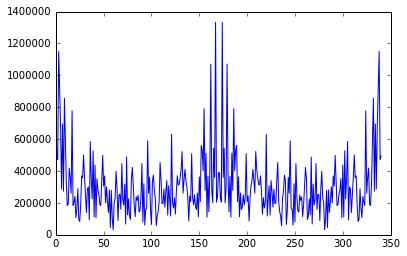

-7876.0 == -7876.0
10209.0 == 10209.0
-9433.0 == -9433.0
-9765.0 == -9765.0
-10791.0 == -10791.0
26325.0 == 26325.0
-11930.0 == -11930.0
-10799.0 == -10799.0
-12843.0 == -12843.0
9421.0 == 9421.0
-13532.0 == -13532.0
18891.0 == 18891.0
-14007.0 == -14007.0
11465.0 == 11465.0
-14292.0 == -14292.0
-20792.0 == -20792.0
-14418.0 == -14418.0
-22073.0 == -22073.0
-14423.0 == -14423.0
-4153.0 == -4153.0
-14353.0 == -14353.0
19911.0 == 19911.0
-14259.0 == -14259.0
-28728.0 == -28728.0
-14193.0 == -14193.0
-32568.0 == -32568.0
-14208.0 == -14208.0
-5176.0 == -5176.0
-14357.0 == -14357.0
-24377.0 == -24377.0
-14688.0 == -14688.0
30918.0 == 30918.0
-15240.0 == -15240.0
20676.0 == 20676.0
-16048.0 == -16048.0
4545.0 == 4545.0
-17135.0 == -17135.0
-20547.0 == -20547.0
-18513.0 == -18513.0
10935.0 == 10935.0
-20182.0 == -20182.0
-27983.0 == -27983.0
-22126.0 == -22126.0
-87.0 == -87.0
-24321.0 == -24321.0
-25952.0 == -25952.0
-26726.0 == -26726.0
-26729.0 == -26729.0
-29289.0 == -29289.0
13453.0 == 

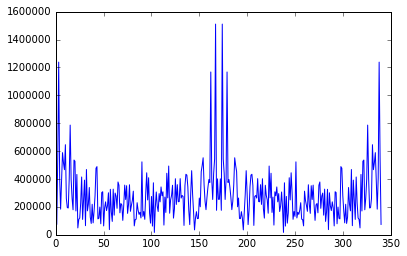

14233.0 == 14233.0
-2761.0 == -2761.0
14325.0 == 14325.0
18487.0 == 18487.0
14408.0 == 14408.0
24120.0 == 24120.0
14430.0 == 14430.0
2360.0 == 2360.0
14345.0 == 14345.0
8248.0 == 8248.0
14112.0 == 14112.0
-32457.0 == -32457.0
13697.0 == 13697.0
4917.0 == 4917.0
13075.0 == 13075.0
-14797.0 == -14797.0
12230.0 == 12230.0
-26833.0 == -26833.0
11159.0 == 11159.0
-30165.0 == -30165.0
9866.0 == 9866.0
-20954.0 == -20954.0
8366.0 == 8366.0
7200.0 == 7200.0
6684.0 == 6684.0
-3046.0 == -3046.0
4852.0 == 4852.0
23826.0 == 23826.0
2909.0 == 2909.0
-31989.0 == -31989.0
899.0 == 899.0
-27645.0 == -27645.0
-1132.0 == -1132.0
-16389.0 == -16389.0
-3137.0 == -3137.0
13299.0 == 13299.0
-5069.0 == -5069.0
6892.0 == 6892.0
-6886.0 == -6886.0
-25371.0 == -25371.0
-8548.0 == -8548.0
-10274.0 == -10274.0
-10025.0 == -10025.0
-7208.0 == -7208.0
-11293.0 == -11293.0
-12845.0 == -12845.0
-12339.0 == -12339.0
-25649.0 == -25649.0
-13157.0 == -13157.0
17868.0 == 17868.0
-13755.0 == -13755.0
-17206.0 == -17206.0


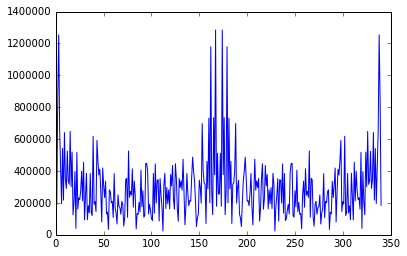

-20178.0 == -20178.0
-5711.0 == -5711.0
-21783.0 == -21783.0
8874.0 == 8874.0
-23774.0 == -23774.0
11939.0 == 11939.0
-26066.0 == -26066.0
25242.0 == 25242.0
-28574.0 == -28574.0
5264.0 == 5264.0
-31212.0 == -31212.0
-26490.0 == -26490.0
31640.0 == 31640.0
15739.0 == 15739.0
28989.0 == 28989.0
18801.0 == 18801.0
26441.0 == 26441.0
-1433.0 == -1433.0
24058.0 == 24058.0
-32163.0 == -32163.0
21890.0 == 21890.0
2133.0 == 2133.0
19976.0 == 19976.0
-23474.0 == -23474.0
18340.0 == 18340.0
25671.0 == 25671.0
16996.0 == 16996.0
17986.0 == 17986.0
15942.0 == 15942.0
15422.0 == 15422.0
15164.0 == 15164.0
12091.0 == 12091.0
14639.0 == 14639.0
-967.0 == -967.0
14332.0 == 14332.0
31031.0 == 31031.0
14201.0 == 14201.0
30007.0 == 30007.0
14197.0 == 14197.0
-17097.0 == -17097.0
14269.0 == 14269.0
6967.0 == 6967.0
14363.0 == 14363.0
23352.0 == 23352.0
14427.0 == 14427.0
19000.0 == 19000.0
14410.0 == 14410.0
-17352.0 == -17352.0
14268.0 == 14268.0
-29897.0 == -29897.0
13963.0 == 13963.0
-26570.0 == -2657

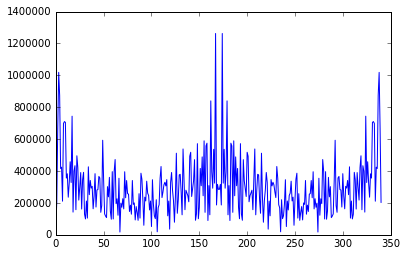

-25957.0 == -25957.0
13978.0 == 13978.0
-20682.0 == -20682.0
17071.0 == 17071.0
-15038.0 == -15038.0
24261.0 == 24261.0
-9122.0 == -9122.0
8412.0 == 8412.0
-3040.0 == -3040.0
6388.0 == 6388.0
3096.0 == 3096.0
-9972.0 == -9972.0
9177.0 == 9177.0
-3293.0 == -3293.0
15091.0 == 15091.0
-966.0 == -966.0
20732.0 == 20732.0
-27824.0 == -27824.0
26003.0 == 26003.0
24165.0 == 24165.0
30814.0 == 30814.0
4472.0 == 4472.0
-30447.0 == -30447.0
28809.0 == 28809.0
-26768.0 == -26768.0
19607.0 == 19607.0
-23732.0 == -23732.0
-30301.0 == -30301.0
-21367.0 == -21367.0
6828.0 == 6828.0
-19686.0 == -19686.0
1203.0 == 1203.0
-18684.0 == -18684.0
24247.0 == 24247.0
-18338.0 == -18338.0
19896.0 == 19896.0
-18611.0 == -18611.0
1463.0 == 1463.0
-19451.0 == -19451.0
-15180.0 == -15180.0
-20796.0 == -20796.0
-10834.0 == -10834.0
-22571.0 == -22571.0
-31065.0 == -31065.0
-24698.0 == -24698.0
11679.0 == 11679.0
-27091.0 == -27091.0
8342.0 == 8342.0
-29664.0 == -29664.0
-18804.0 == -18804.0
-32330.0 == -32330.0
160

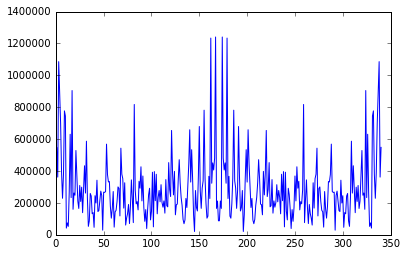

-24078.0 == -24078.0
-24159.0 == -24159.0
-26463.0 == -26463.0
-21608.0 == -21608.0
-29013.0 == -29013.0
20366.0 == 20366.0
-31665.0 == -31665.0
-11132.0 == -11132.0
31188.0 == 31188.0
-30855.0 == -30855.0
28551.0 == 28551.0
-17297.0 == -17297.0
26044.0 == 26044.0
-13723.0 == -13723.0
23754.0 == 23754.0
1884.0 == 1884.0
21767.0 == 21767.0
-15019.0 == -15019.0
20165.0 == 20165.0
21326.0 == 21326.0
19027.0 == 19027.0
-2486.0 == -2486.0
18422.0 == 18422.0
-6329.0 == -6329.0
18407.0 == 18407.0
21831.0 == 21831.0
19029.0 == 19029.0
24394.0 == 24394.0
20319.0 == 20319.0
4943.0 == 4943.0
22291.0 == 22291.0
29015.0 == 29015.0
24945.0 == 24945.0
25441.0 == 25441.0
28259.0 == 28259.0
-14482.0 == -14482.0
32199.0 == 32199.0
26493.0 == 26493.0
-28825.0 == -28825.0
143.0 == 143.0
-23808.0 == -23808.0
16547.0 == 16547.0
-18368.0 == -18368.0
-13640.0 == -13640.0
-12598.0 == -12598.0
14542.0 == 14542.0
-6600.0 == -6600.0
8166.0 == 8166.0
-481.0 == -481.0
3582.0 == 3582.0
5645.0 == 5645.0
-27114.0 == -

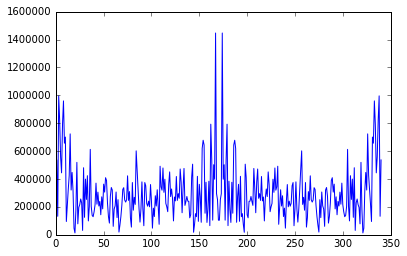

-11170.0 == -11170.0
12756.0 == 12756.0
-12239.0 == -12239.0
-6192.0 == -6192.0
-13081.0 == -13081.0
31436.0 == 31436.0
-13702.0 == -13702.0
-8758.0 == -8758.0
-14115.0 == -14115.0
-2616.0 == -2616.0
-14347.0 == -14347.0
-23865.0 == -23865.0
-14430.0 == -14430.0
-17977.0 == -17977.0
-14407.0 == -14407.0
3271.0 == 3271.0
-14324.0 == -14324.0
26568.0 == 26568.0
-14233.0 == -14233.0
-26936.0 == -26936.0
-14186.0 == -14186.0
25288.0 == 25288.0
-14238.0 == -14238.0
-26168.0 == -26168.0
-14439.0 == -14439.0
3783.0 == 3783.0
-14834.0 == -14834.0
-26170.0 == -26170.0
-15463.0 == -15463.0
7363.0 == 7363.0
-16356.0 == -16356.0
-31808.0 == -31808.0
-17533.0 == -17533.0
-14661.0 == -14661.0
-19002.0 == -19002.0
-5451.0 == -5451.0
-20758.0 == -20758.0
-82.0 == -82.0
-22785.0 == -22785.0
9894.0 == 9894.0
-25050.0 == -25050.0
-30050.0 == -30050.0
-27510.0 == -27510.0
25236.0 == 25236.0
-30110.0 == -30110.0
-3958.0 == -3958.0
32752.0 == 32752.0
32383.0 == 32383.0
30078.0 == 30078.0
23925.0 == 23925.0


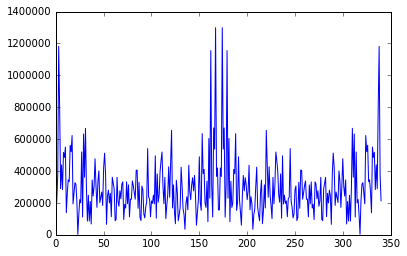

14423.0 == 14423.0
20792.0 == 20792.0
14417.0 == 14417.0
-11464.0 == -11464.0
14291.0 == 14291.0
-19401.0 == -19401.0
14004.0 == 14004.0
-10698.0 == -10698.0
13526.0 == 13526.0
9268.0 == 9268.0
12836.0 == 12836.0
-28366.0 == -28366.0
11921.0 == 11921.0
6958.0 == 6958.0
10779.0 == 10779.0
-13270.0 == -13270.0
9420.0 == 9420.0
-19164.0 == -19164.0
7861.0 == 7861.0
-4066.0 == -4066.0
6128.0 == 6128.0
-24297.0 == -24297.0
4257.0 == 4257.0
-3824.0 == -3824.0
2289.0 == 2289.0
2568.0 == 2568.0
266.0 == 266.0
7937.0 == 7937.0
-1761.0 == -1761.0
23801.0 == 23801.0
-3748.0 == -3748.0
-4111.0 == -4111.0
-5649.0 == -5649.0
1001.0 == 1001.0
-7421.0 == -7421.0
-17437.0 == -17437.0
-9029.0 == -9029.0
13788.0 == 13788.0
-10443.0 == -10443.0
-31273.0 == -31273.0
-11643.0 == -11643.0
-18734.0 == -18734.0
-12618.0 == -12618.0
-13618.0 == -13618.0
-13366.0 == -13366.0
-18741.0 == -18741.0
-13898.0 == -13898.0
26825.0 == 26825.0
-14232.0 == -14232.0
-15416.0 == -15416.0
-14397.0 == -14397.0
-24121.0 == -24

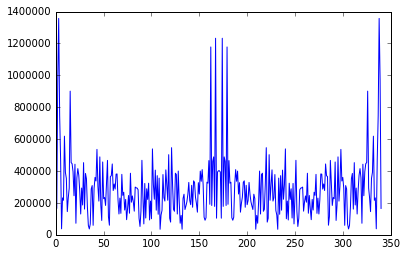

-24459.0 == -24459.0
13472.0 == 13472.0
-26828.0 == -26828.0
13975.0 == 13975.0
-29386.0 == -29386.0
-11891.0 == -11891.0
-32047.0 == -32047.0
22658.0 == 22658.0
30808.0 == 30808.0
5496.0 == 5496.0
28181.0 == 28181.0
20334.0 == 20334.0
25679.0 == 25679.0
15972.0 == 15972.0
23358.0 == 23358.0
4443.0 == 4443.0
21265.0 == 21265.0
-5037.0 == -5037.0
19436.0 == 19436.0
-7605.0 == -7605.0
17890.0 == 17890.0
-699.0 == -699.0
16637.0 == 16637.0
14144.0 == 14144.0
15671.0 == 15671.0
32573.0 == 32573.0
14975.0 == 14975.0
-17862.0 == -17862.0
14522.0 == 14522.0
-15816.0 == -15816.0
14274.0 == 14274.0
27703.0 == 27703.0
14188.0 == 14188.0
-31177.0 == -31177.0
14214.0 == 14214.0
-9417.0 == -9417.0
14299.0 == 14299.0
13623.0 == 13623.0
14389.0 == 14389.0
24888.0 == 24888.0
14433.0 == 14433.0
11832.0 == 11832.0
14382.0 == 14382.0
28728.0 == 28728.0
14192.0 == 14192.0
1335.0 == 1335.0
13829.0 == 13829.0
-11978.0 == -11978.0
13265.0 == 13265.0
-15821.0 == -15821.0
12482.0 == 12482.0
-12240.0 == -12240.

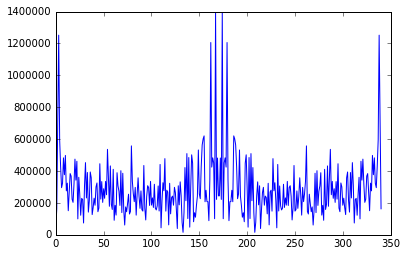

-13220.0 == -13220.0
-18484.0 == -18484.0
-7241.0 == -7241.0
-26909.0 == -26909.0
-1130.0 == -1130.0
-30213.0 == -30213.0
5001.0 == 5001.0
8467.0 == 8467.0
11041.0 == 11041.0
-3797.0 == -3797.0
16881.0 == 16881.0
-28351.0 == -28351.0
22417.0 == 22417.0
-23977.0 == -23977.0
27554.0 == 27554.0
-12949.0 == -12949.0
32205.0 == 32205.0
-12931.0 == -12931.0
-29235.0 == -29235.0
26765.0 == 26765.0
-25752.0 == -25752.0
30363.0 == 30363.0
-22922.0 == -22922.0
-8538.0 == -8538.0
-20770.0 == -20770.0
-25938.0 == -25938.0
-19302.0 == -19302.0
-19020.0 == -19020.0
-18507.0 == -18507.0
19127.0 == 19127.0
-18358.0 == -18358.0
-32072.0 == -32072.0
-18814.0 == -18814.0
-27210.0 == -27210.0
-19819.0 == -19819.0
-14670.0 == -14670.0
-21306.0 == -21306.0
24748.0 == 24748.0
-23200.0 == -23200.0
-19035.0 == -19035.0
-25419.0 == -25419.0
7068.0 == 7068.0
-27877.0 == -27877.0
-5997.0 == -5997.0
-30488.0 == -30488.0
29064.0 == 29064.0
32369.0 == 32369.0
1662.0 == 1662.0
29702.0 == 29702.0
-4236.0 == -4236.0
27

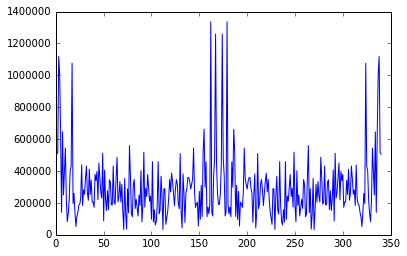

-29830.0 == -29830.0
3211.0 == 3211.0
-32500.0 == -32500.0
-27007.0 == -27007.0
30358.0 == 30358.0
26742.0 == 26742.0
27752.0 == 27752.0
-10132.0 == -10132.0
25304.0 == 25304.0
15202.0 == 15202.0
23099.0 == 23099.0
-6310.0 == -6310.0
21223.0 == 21223.0
11858.0 == 11858.0
19758.0 == 19758.0
23373.0 == 23373.0
18779.0 == 18779.0
-20663.0 == -20663.0
18351.0 == 18351.0
25415.0 == 25415.0
18531.0 == 18531.0
-25016.0 == -25016.0
19358.0 == 19358.0
31819.0 == 31819.0
20860.0 == 20860.0
1361.0 == 1361.0
23045.0 == 23045.0
13146.0 == 13146.0
25907.0 == 25907.0
-4763.0 == -4763.0
29421.0 == 29421.0
2418.0 == 2418.0
-31991.0 == -31991.0
20355.0 == 20355.0
-27313.0 == -27313.0
30101.0 == 30101.0
-22155.0 == -22155.0
9897.0 == 9897.0
-16602.0 == -16602.0
703.0 == 703.0
-10750.0 == -10750.0
-23850.0 == -23850.0
-4702.0 == -4702.0
-26899.0 == -26899.0
1430.0 == 1430.0
28933.0 == 28933.0
7537.0 == 7537.0
-15587.0 == -15587.0
13507.0 == 13507.0
8500.0 == 8500.0
19233.0 == 19233.0
9547.0 == 9547.0
2461

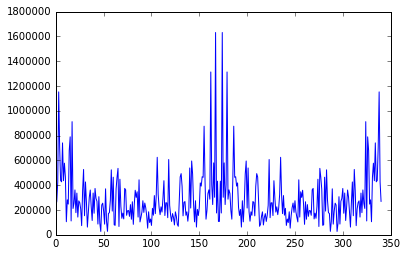

-13298.0 == -13298.0
-6964.0 == -6964.0
-13852.0 == -13852.0
-31799.0 == -31799.0
-14205.0 == -14205.0
-12856.0 == -12856.0
-14387.0 == -14387.0
-24377.0 == -24377.0
-14432.0 == -14432.0
-12345.0 == -12345.0
-14385.0 == -14385.0
10951.0 == 10951.0
-14294.0 == -14294.0
32200.0 == 32200.0
-14211.0 == -14211.0
-27704.0 == -27704.0
-14189.0 == -14189.0
14024.0 == 14024.0
-14282.0 == -14282.0
13768.0 == 13768.0
-14539.0 == -14539.0
26055.0 == 26055.0
-15003.0 == -15003.0
-24379.0 == -24379.0
-15712.0 == -15712.0
-13118.0 == -13118.0
-16692.0 == -16692.0
-9794.0 == -9794.0
-17959.0 == -17959.0
-15943.0 == -15943.0
-19519.0 == -19519.0
-29005.0 == -29005.0
-21362.0 == -21362.0
22188.0 == 22188.0
-23466.0 == -23466.0
15268.0 == 15268.0
-25797.0 == -25797.0
28059.0 == 28059.0
-28307.0 == -28307.0
9873.0 == 9873.0
-30938.0 == -30938.0
-21625.0 == -21625.0
31915.0 == 31915.0
19068.0 == 19068.0
29258.0 == 29258.0
21362.0 == 21362.0
26707.0 == 26707.0
7784.0 == 7784.0
24350.0 == 24350.0
95.00000000

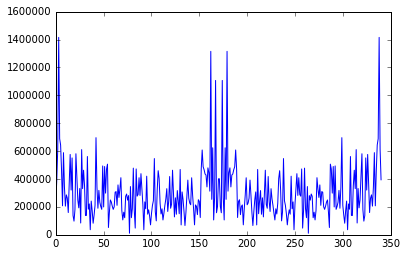

14220.0 == 14220.0
13623.0 == 13623.0
13877.0 == 13877.0
5942.0 == 5942.0
13335.0 == 13335.0
7988.0 == 7988.0
12575.0 == 12575.0
17969.0 == 17969.0
11590.0 == 11590.0
-29907.0 == -29907.0
10379.0 == 10379.0
-1240.0 == -1240.0
8955.0 == 8955.0
-21982.0 == -21982.0
7338.0 == 7338.0
-18660.0 == -18660.0
5559.0 == 5559.0
17685.0 == 17685.0
3653.0 == 3653.0
32270.0 == 32270.0
1662.0 == 1662.0
-28154.0 == -28154.0
-366.0 == -366.0
-20738.0 == -20738.0
-2386.0 == -2386.0
502.0 == 502.0
-4351.0 == -4351.0
-18193.0 == -18193.0
-6216.0 == -6216.0
-1049.0 == -1049.0
-7941.0 == -7941.0
-4640.0 == -4640.0
-9491.0 == -9491.0
-22310.0 == -22310.0
-10840.0 == -10840.0
15829.0 == 15829.0
-11971.0 == -11971.0
-18991.0 == -18991.0
-12875.0 == -12875.0
3789.0 == 3789.0
-13554.0 == -13554.0
15051.0 == 15051.0
-14022.0 == -14022.0
9417.0 == 9417.0
-14300.0 == -14300.0
-21304.0 == -21304.0
-14420.0 == -14420.0
-21561.0 == -21561.0
-14421.0 == -14421.0
-3385.0 == -3385.0
-14350.0 == -14350.0
20935.0 == 20935.

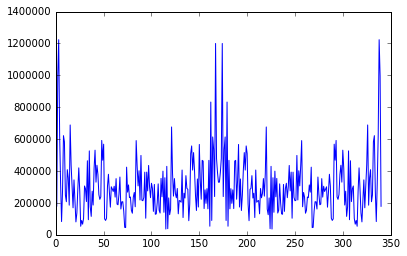

-30207.0 == -30207.0
-29302.0 == -29302.0
32653.0 == 32653.0
7551.0 == 7551.0
29981.0 == 29981.0
-1419.0 == -1419.0
27386.0 == 27386.0
26218.0 == 26218.0
24934.0 == 24934.0
-26527.0 == -26527.0
22680.0 == 22680.0
-17832.0 == -17832.0
20666.0 == 20666.0
-5040.0 == -5040.0
18924.0 == 18924.0
15689.0 == 15689.0
17469.0 == 17469.0
-19900.0 == -19900.0
16306.0 == 16306.0
16959.0 == 16959.0
15426.0 == 15426.0
-9668.0 == -9668.0
14810.0 == 14810.0
22841.0 == 22841.0
14425.0 == 14425.0
-26568.0 == -26568.0
14232.0 == 14232.0
27447.0 == 27447.0
14187.0 == 14187.0
-25545.0 == -25545.0
14236.0 == 14236.0
-1737.0 == -1737.0
14329.0 == 14329.0
18999.0 == 18999.0
14410.0 == 14410.0
23864.0 == 23864.0
14429.0 == 14429.0
824.0 == 824.0
14339.0 == 14339.0
4920.0 == 4920.0
14099.0 == 14099.0
27703.0 == 27703.0
13676.0 == 13676.0
-2763.0 == -2763.0
13045.0 == 13045.0
-24526.0 == -24526.0
12192.0 == 12192.0
26671.0 == 26671.0
11112.0 == 11112.0
21035.0 == 21035.0
9810.0 == 9810.0
28454.0 == 28454.0
8303.0

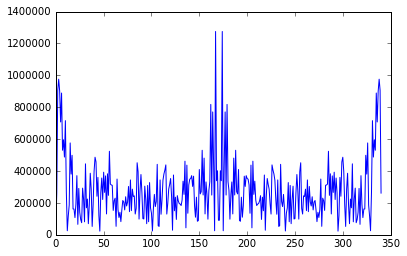

781.0 == 781.0
-4093.0 == -4093.0
6896.0 == 6896.0
22042.0 == 22042.0
12886.0 == 12886.0
-11726.0 == -11726.0
18642.0 == 18642.0
72.0 == 72.0
24064.0 == 24064.0
-32162.0 == -32162.0
29058.0 == 29058.0
1905.0 == 1905.0
-31993.0 == -31993.0
20099.0 == 20099.0
-28082.0 == -28082.0
8594.0 == 8594.0
-24799.0 == -24799.0
23967.0 == 23967.0
-22179.0 == -22179.0
-3927.0 == -3927.0
-20240.0 == -20240.0
-9808.0 == -9808.0
-18983.0 == -18983.0
10165.0 == 10165.0
-18393.0 == -18393.0
-1352.0 == -1352.0
-18438.0 == -18438.0
-32329.0 == -32329.0
-19071.0 == -19071.0
-2123.0 == -2123.0
-20233.0 == -20233.0
-24400.0 == -24400.0
-21856.0 == -21856.0
-13142.0 == -13142.0
-23860.0 == -23860.0
-12638.0 == -12638.0
-26162.0 == -26162.0
-1127.0 == -1127.0
-28677.0 == -28677.0
-21873.0 == -21873.0
-31318.0 == -31318.0
11909.0 == 11909.0
31534.0 == 31534.0
-10885.0 == -10885.0
28885.0 == 28885.0
-6288.0 == -6288.0
26343.0 == 26343.0
-24730.0 == -24730.0
23967.0 == 23967.0
12637.0 == 12637.0
21809.0 == 21809.0

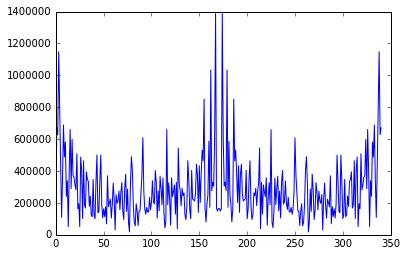

29535.0 == 29535.0
22899.0 == 22899.0
26969.0 == 26969.0
2921.0 == 2921.0
24587.0 == 24587.0
-13216.0 == -13216.0
22476.0 == 22476.0
-4265.0 == -4265.0
20719.0 == 20719.0
-14768.0 == -14768.0
19398.0 == 19398.0
-26549.0 == -26549.0
18584.0 == 18584.0
-23480.0 == -23480.0
18340.0 == 18340.0
7495.0 == 7495.0
18717.0 == 18717.0
10569.0 == 10569.0
19753.0 == 19753.0
-9395.0 == -9395.0
21467.0 == 21467.0
14675.0 == 14675.0
23865.0 == 23865.0
13661.0 == 13661.0
26933.0 == 26933.0
-19863.0 == -19863.0
30642.0 == 30642.0
-32137.0 == -32137.0
-30590.0 == -30590.0
25992.0 == 25992.0
-25755.0 == -25755.0
4251.0 == 4251.0
-20464.0 == -20464.0
10672.0 == 10672.0
-14807.0 == -14807.0
19910.0 == 19910.0
-8883.0 == -8883.0
5085.0 == 5085.0
-2797.0 == -2797.0
3317.0 == 3317.0
3340.0 == 3340.0
-14323.0 == -14323.0
9416.0 == 9416.0
-9948.0 == -9948.0
15321.0 == 15321.0
-10949.0 == -10949.0
20949.0 == 20949.0
23377.0 == 23377.0
26203.0 == 26203.0
4710.0 == 4710.0
30994.0 == 30994.0
-20615.0 == -20615.0
-3

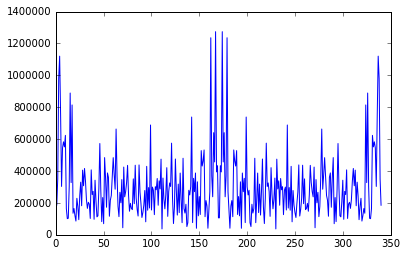

-14279.0 == -14279.0
-19768.0 == -19768.0
-14414.0 == -14414.0
-22585.0 == -22585.0
-14425.0 == -14425.0
-5689.0 == -5689.0
-14359.0 == -14359.0
18375.0 == 18375.0
-14265.0 == -14265.0
-29240.0 == -29240.0
-14195.0 == -14195.0
-31544.0 == -31544.0
-14204.0 == -14204.0
-1336.0 == -1336.0
-14342.0 == -14342.0
-16953.0 == -16953.0
-14659.0 == -14659.0
-23354.0 == -23354.0
-15196.0 == -15196.0
-29244.0 == -29244.0
-15987.0 == -15987.0
25025.0 == 25025.0
-17055.0 == -17055.0
4797.0 == 4797.0
-18414.0 == -18414.0
-24136.0 == -24136.0
-20063.0 == -20063.0
6833.0 == 6833.0
-21990.0 == -21990.0
-26710.0 == -26710.0
-24169.0 == -24169.0
16033.0 == 16033.0
-26562.0 == -26562.0
17304.0 == 17304.0
-29117.0 == -29117.0
-6770.0 == -6770.0
-31771.0 == -31771.0
27011.0 == 27011.0
31081.0 == 31081.0
8313.0 == 8313.0
28448.0 == 28448.0
23663.0 == 23663.0
25948.0 == 25948.0
30053.0 == 30053.0
23669.0 == 23669.0
-16548.0 == -16548.0
21695.0 == 21695.0
-28844.0 == -28844.0
20111.0 == 20111.0
12622.0 == 1262

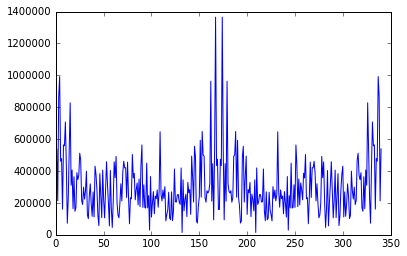

In [ ]:
%matplotlib inline
from pylab import *
import sympy
import wave
import struct
import numpy

buffer_size = 2048
audio_file = wave.open('wavs/1a_0_phase.wav', 'r')
out_file = wave.open('wavs/2d.wav', 'w')

out_file.setparams(audio_file.getparams())

num_of_frames = buffer_size / (audio_file.getsampwidth() + audio_file.getnchannels())

while True:
    frames = audio_file.readframes(int(num_of_frames))
    if not frames:
        break
    working_set = [struct.unpack('h', frames[i:i+2])[0] for i in range(0, int(num_of_frames / 2))]
    fft_set = fft(working_set)
    time_set = arange(len(fft_set))
    figure()
    plot(time_set, abs(fft_set))
    show()
    inverse_fft_set = ifft(fft_set)
    
    for i in range(0, len(inverse_fft_set)):
            print(inverse_fft_set[i].real, "==", float(working_set[i]))
    
    for i in inverse_fft_set:
        packed_value = struct.pack('h', int16(i.real))
        out_file.writeframes(packed_value)
out_file.close()
    

## 2.e (\*)

Read about the overlap-add of computing the Short Time Fourier Transform. Basically the idea is to window each  buffer and read the data in overlapping chunks so that when they are summed the two windows sum up to 1. First ensure that you can do proper overlap-add by reading buffer that overlap by half and windowing them appropriately.  Once you have that working apply the same process as the previous question of randomizing the phase spectrum. What has changed compared to before?